# Abstract

# Introduction

Driving is a routine activity for most adults, so routine that it is easy to overlook that it is perhaps the most dangerous activity that people participate in on a regular basis. The National Highway Traffic Safety Administration (NHTSA) estimated that around 39,000 individuals were killed in auto accidents in 2024. Additionally, serious injuries represent a significant risk when driving. Given the grave toll to human life andd well-being, it is important to understand the contributing factors to severe auto accidents resulting in fatalities or serious injuries. This project will attempt to identify such adverse factors utilizing publically available data summarizing auto accidents in Pennslyvania during 2024. 

# Exploratory Data Analysis

The data analyzed in this project is courtesy of the Pennsylvania Department of Transportation. Prior to any tidying, the dataset contains data for 110,813 accidents (rows) across 111 features or characteristics (columns), nearly all of which are coded with a binary outcome (1 or 0). The key variable of interest that will be used for grouping data for this project is “FATAL_OR_SUSP_SERIOUS_INJ”, which captures whether a given accident resulted in any fatalities or serious injuries.

A preliminary graphical exploration of the “FATAL_OR_SUSP_SERIOUS_INJ” feature reveals 5,056 accidents with a fatality or a serious injury. Examining the data types of the columns reveals that all columns are of an "int64" data type, ideally suited for downstream analyses. In respect to missing values, all columns have a full compliment of data. However, there are a number of columns that will need to be dropped since they are either irrelevant or overlap with the grouping variable enough to warrant removal. 

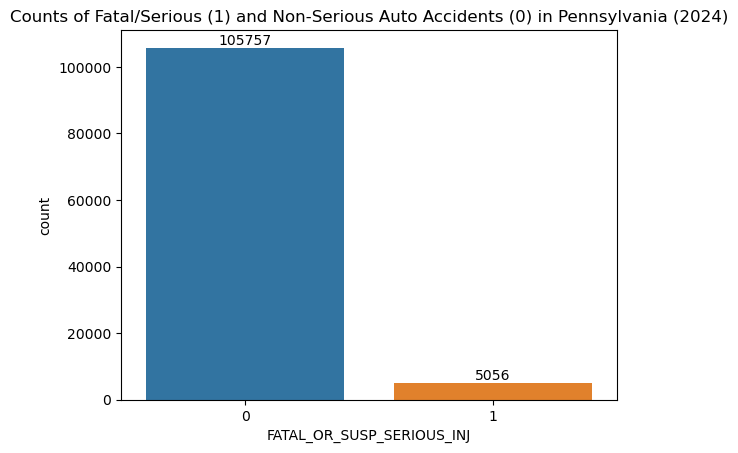

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 111 columns):
 #    Column                         Non-Null Count   Dtype
---   ------                         --------------   -----
 0    CRN                            110813 non-null  int64
 1    AGGRESSIVE_DRIVING             110813 non-null  int64
 2    ALCOHOL_RELATED                110813 non-null  int64
 3    ANGLE_CRASH                    110813 non-null  int64
 4    ATV                            110813 non-null  int64
 5    BICYCLE                        110813 non-null  int64
 6    CELL_PHONE                     110813 non-null  int64
 7    COMM_VEHICLE                   110813 non-null  int64
 8    CROSS_MEDIAN                   110813 non-null  int64
 9    CURVED_ROAD                    110813 non-null  int64
 10   CURVE_DVR_ERROR                110813 non-null  int64
 11   DEER_RELATED                   110813 non-null  int64
 12   DISTRACTED                     110813 non-

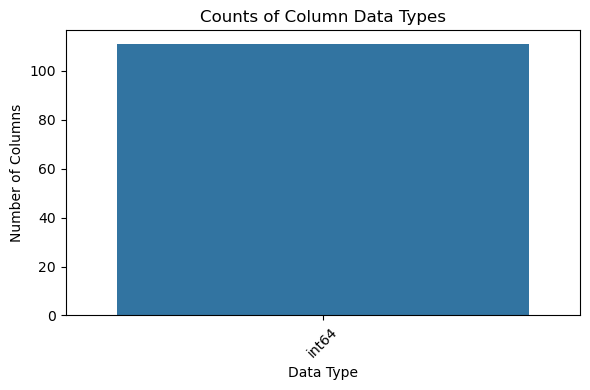

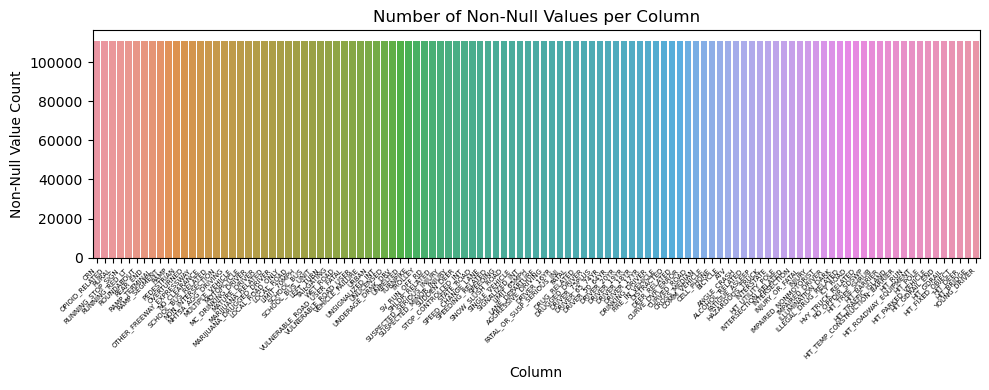

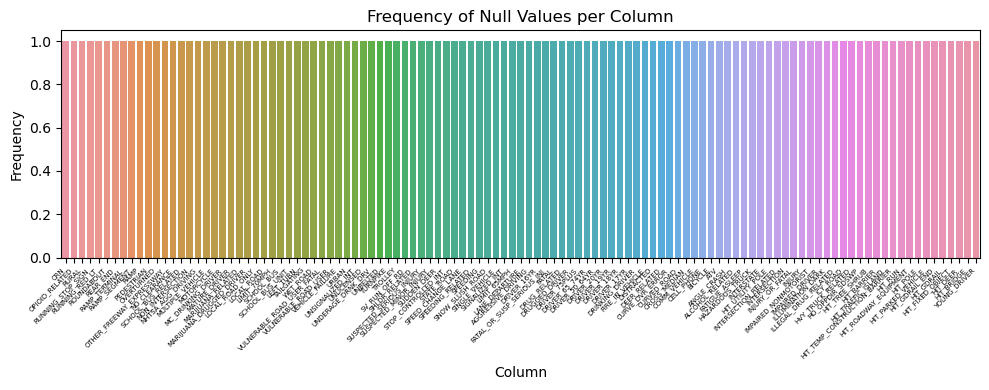

In [105]:
# load packages and data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency

#Load dataset from my github 
data = pd.read_csv("https://raw.githubusercontent.com/kr0710/DATA602/refs/heads/main/FLAGS_2024_PA.csv")

# Plot the initial distribution of the variable, "FATAL_OR_SUSP_SERIOUS_INJ", that will be the variable used for grouping
severity_plot = sns.countplot(x="FATAL_OR_SUSP_SERIOUS_INJ", data=data)
severity_plot.set_title("Counts of Fatal/Serious (1) and Non-Serious Auto Accidents (0) in Pennsylvania (2024)")

#Count the number of fatal/serious and non-serious accidents to annotate the plot
for p in severity_plot.patches:
    count = int(p.get_height())
    severity_plot.annotate(
        count,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10)

plt.show()

#Print data info for first look at data types and extent of missing values
print(data.info(verbose=True, show_counts=True))

#Plot data types
dtype_df = pd.DataFrame({"column": data.columns,
                         "dtype": data.dtypes.astype(str)})

plt.figure(figsize=(6, 4))
sns.countplot(data=dtype_df, x="dtype")
plt.title("Counts of Column Data Types")
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Plot the number and frequency of non-null values in each column
non_null_df = pd.DataFrame({
    "column": data.columns,
    "Non_null_count": (data.notna().sum()).to_numpy()})

non_null_df.sort_values(by="Non_null_count", ascending=False, inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(data=non_null_df, x="column", y="Non_null_count")
plt.title("Number of Non-Null Values per Column")
plt.xlabel("Column")
plt.ylabel("Non-Null Value Count")
plt.xticks(rotation=45, ha="right", fontsize=5)
plt.tight_layout()
plt.show()

non_null_df['Null_Freq'] = non_null_df['Non_null_count']/110813
plt.figure(figsize=(10, 4))
sns.barplot(data=non_null_df, x="column", y="Null_Freq")
plt.title("Frequency of Null Values per Column")
plt.xlabel("Column")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right", fontsize=5)
plt.tight_layout()
plt.show()


# Data Wrangling and Tidying

Exploratory data analysis revealed no glaring issues that required resolution prior to proceeding to analysis. Notably, there were no missing values in the dataset. However, some columns will dropped that are either not relevant (e.g. CRN, crash record number) or overlap with the grouping variable (e.g. "FATAL"). 

For ease of downstream analyses, the "FATAL_OR_SUSP_SERIOUS_INJ" column was moved to the last column of the data frame. 



In [106]:
#Drop columns decided to be unneeded
cols_to_drop = ["CRN", "FATAL", "INJURY", "INJURY_OR_FATAL", "SUSPECTED_MINOR_INJURY", "SUSPECTED_SERIOUS_INJURY"]

data.drop(columns=cols_to_drop, errors="ignore", inplace=True)

# Move"FATAL_OR_SUSP_SERIOUS_INJ" to the final column
data["FATAL_OR_SUSP_SERIOUS_INJ"] = data.pop("FATAL_OR_SUSP_SERIOUS_INJ")

#Print updated dataframe
print(data.info(verbose=True, show_counts=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110813 entries, 0 to 110812
Data columns (total 105 columns):
 #    Column                         Non-Null Count   Dtype
---   ------                         --------------   -----
 0    AGGRESSIVE_DRIVING             110813 non-null  int64
 1    ALCOHOL_RELATED                110813 non-null  int64
 2    ANGLE_CRASH                    110813 non-null  int64
 3    ATV                            110813 non-null  int64
 4    BICYCLE                        110813 non-null  int64
 5    CELL_PHONE                     110813 non-null  int64
 6    COMM_VEHICLE                   110813 non-null  int64
 7    CROSS_MEDIAN                   110813 non-null  int64
 8    CURVED_ROAD                    110813 non-null  int64
 9    CURVE_DVR_ERROR                110813 non-null  int64
 10   DEER_RELATED                   110813 non-null  int64
 11   DISTRACTED                     110813 non-null  int64
 12   DRINKING_DRIVER                110813 non-

C:\Users\kjr50\AppData\Local\Temp\ipykernel_2344\66722408.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data["FATAL_OR_SUSP_SERIOUS_INJ"] = data.pop("FATAL_OR_SUSP_SERIOUS_INJ")


# Visualizations and Analysis

The rows of the dataset were grouped by "FATAL_OR_SUSP_SERIOUS_INJ" outcome. Next, for each remaining feature, the binary (1 or 0) outcomes for each group were graphed as a proportion. In addition to graphing, chi squared was used to test for significance of differences in the proportion of outcomes for each group for a given feature. Additionally, odds ratios were calculated for each feature. A summary dataframe eith the aformentioned results was generated and used to graph the significant features with positive odds ratios, indicating they are a factor in fatal or serious injuries occuring from traffic accidents.

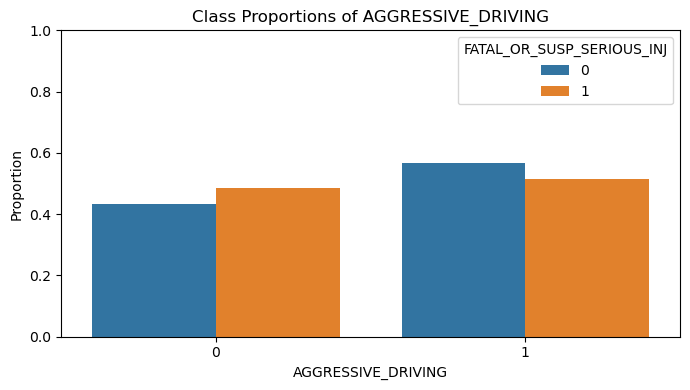

AGGRESSIVE_DRIVING             0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          45840  59917
1                           2452   2604


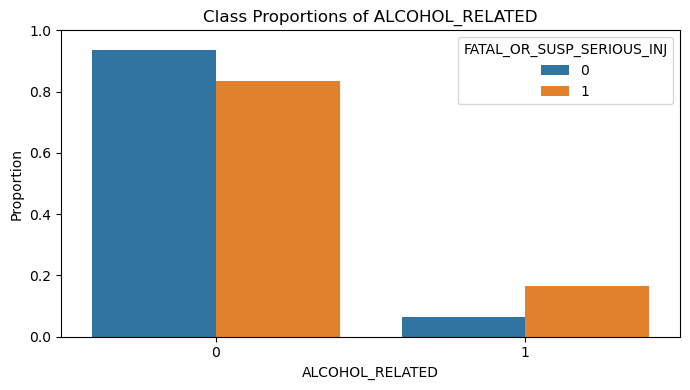

ALCOHOL_RELATED                0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          98826  6931
1                           4226   830


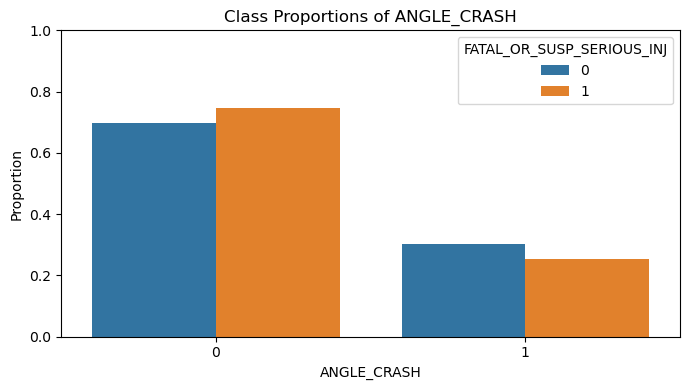

ANGLE_CRASH                    0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          73864  31893
1                           3776   1280


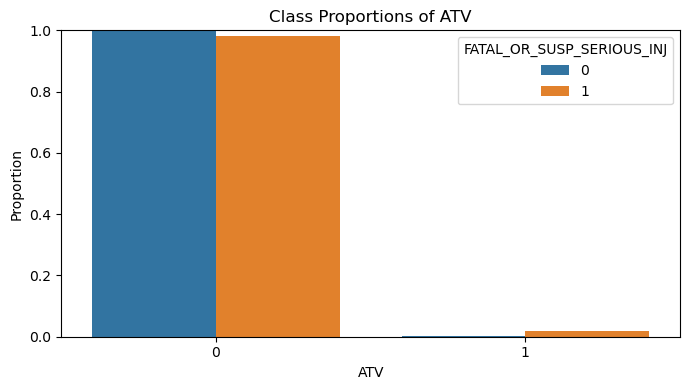

ATV                             0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105642  115
1                            4969   87


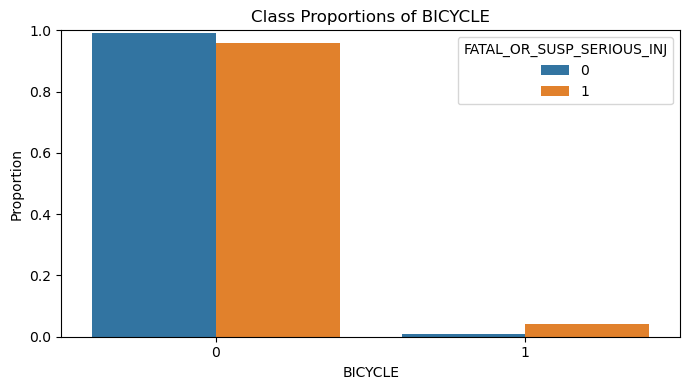

BICYCLE                         0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          104691  1066
1                            4851   205


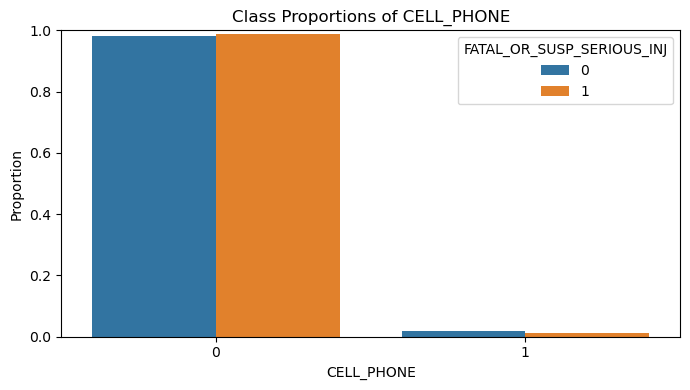

CELL_PHONE                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103888  1869
1                            4998    58


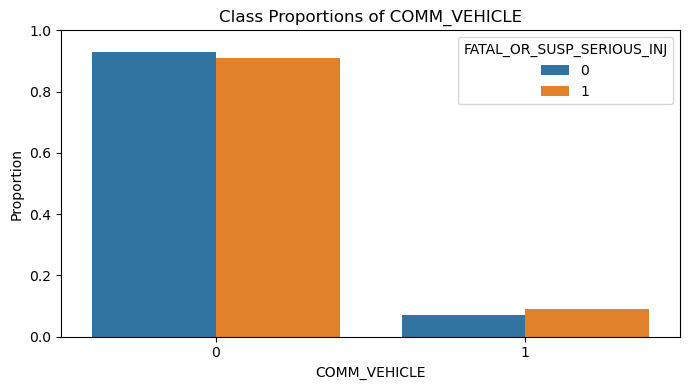

COMM_VEHICLE                   0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          98131  7626
1                           4605   451


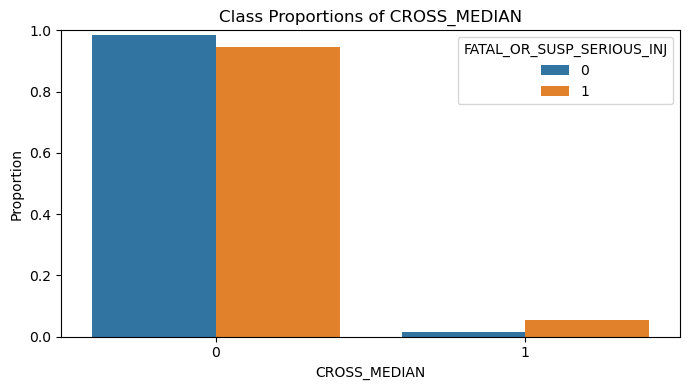

CROSS_MEDIAN                    0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          104233  1524
1                            4785   271


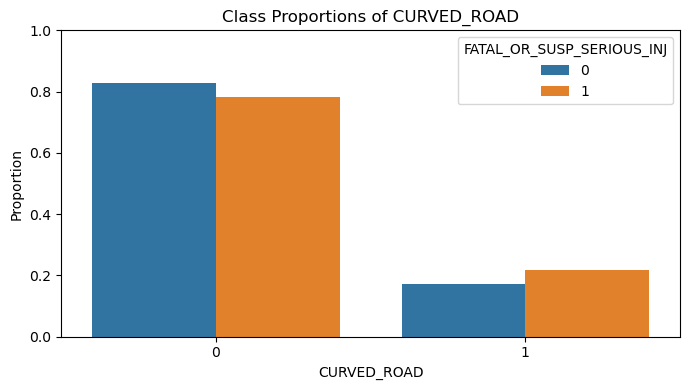

CURVED_ROAD                    0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          87598  18159
1                           3949   1107


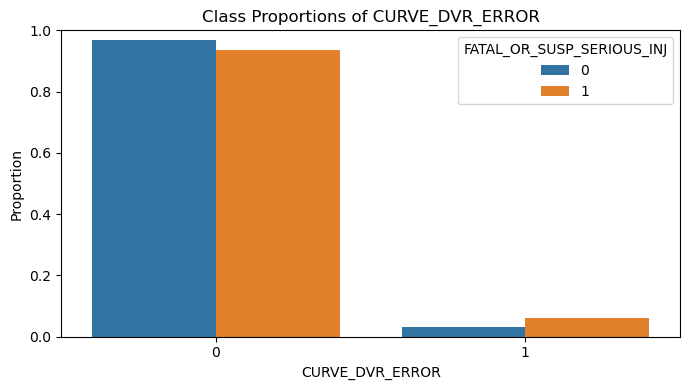

CURVE_DVR_ERROR                 0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102458  3299
1                            4739   317


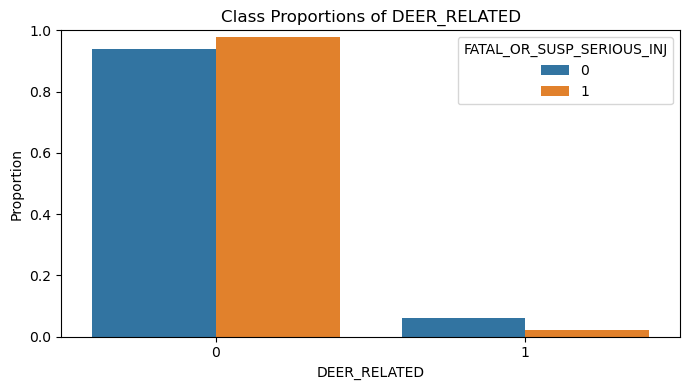

DEER_RELATED                   0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99448  6309
1                           4944   112


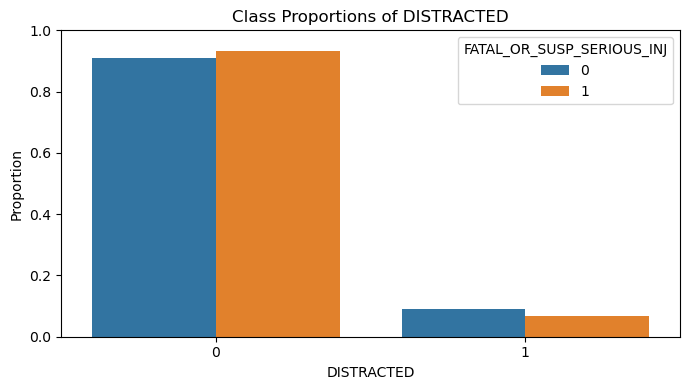

DISTRACTED                     0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          96125  9632
1                           4722   334


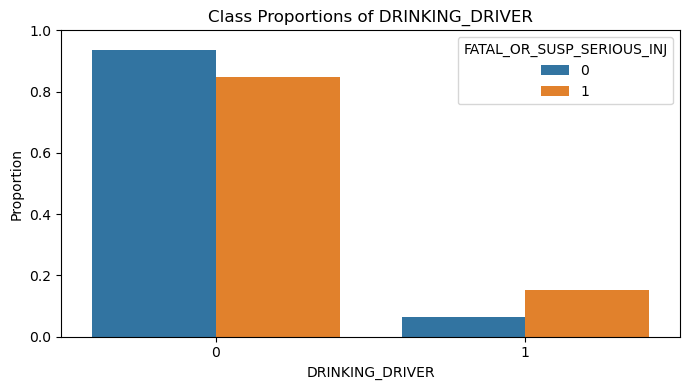

DRINKING_DRIVER                0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          98921  6836
1                           4292   764


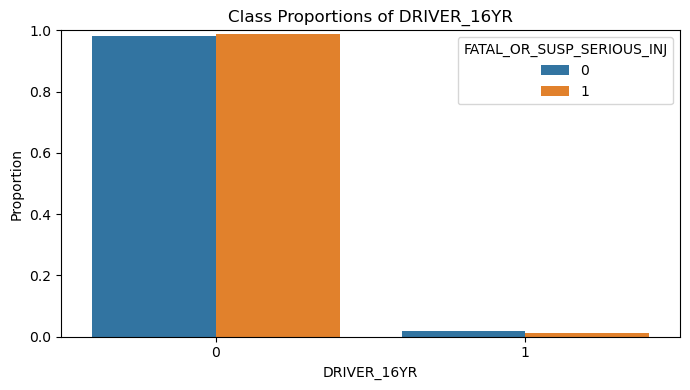

DRIVER_16YR                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103863  1894
1                            4999    57


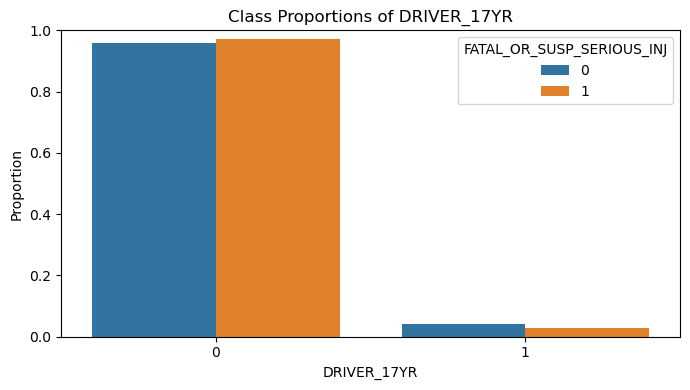

DRIVER_17YR                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101358  4399
1                            4920   136


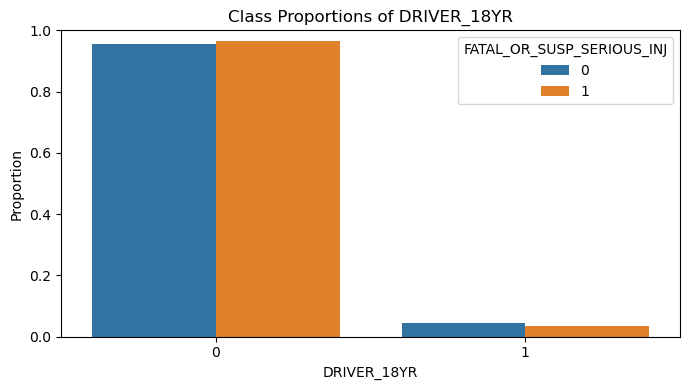

DRIVER_18YR                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101002  4755
1                            4885   171


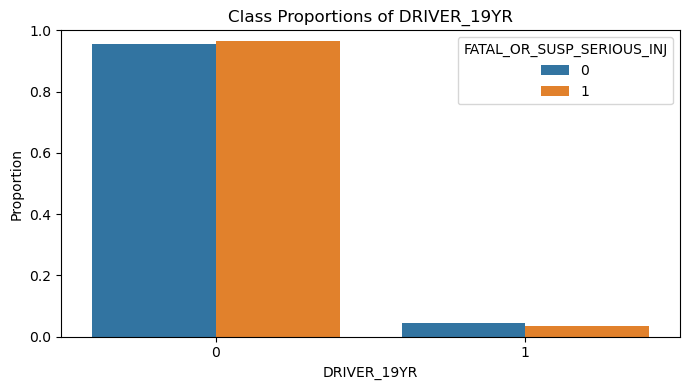

DRIVER_19YR                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101013  4744
1                            4882   174


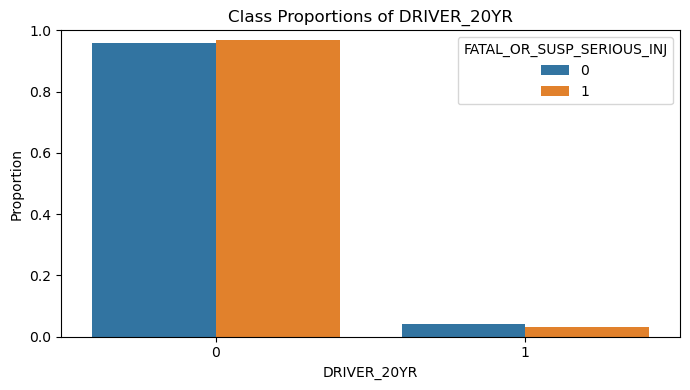

DRIVER_20YR                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101463  4294
1                            4897   159


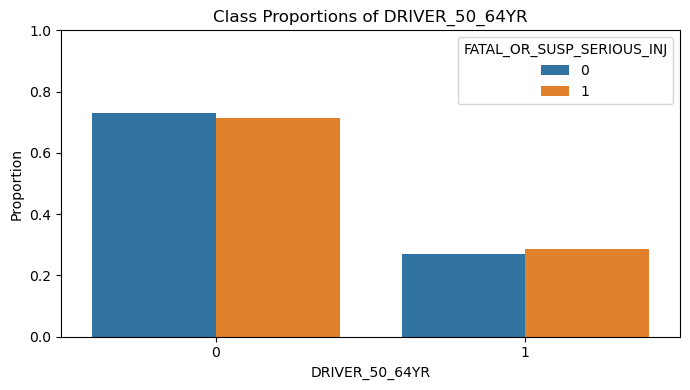

DRIVER_50_64YR                 0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          77333  28424
1                           3608   1448


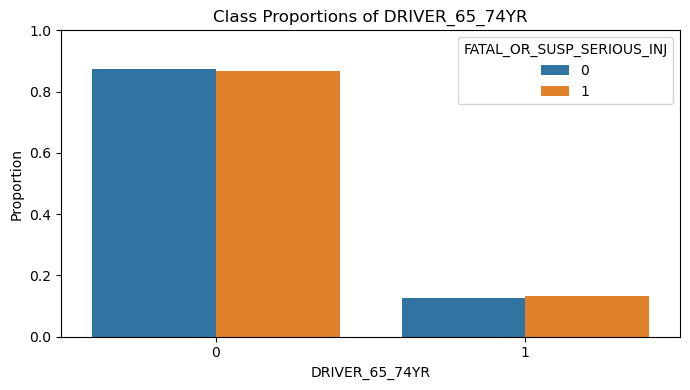

DRIVER_65_74YR                 0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          92540  13217
1                           4386    670


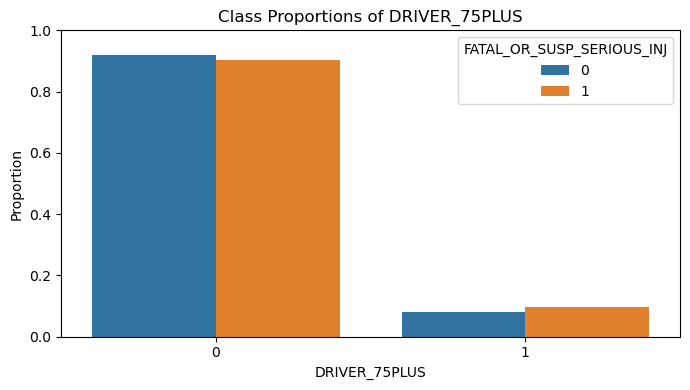

DRIVER_75PLUS                  0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          97205  8552
1                           4563   493


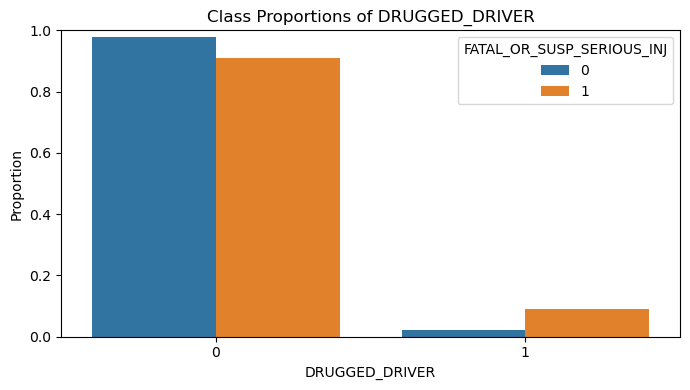

DRUGGED_DRIVER                  0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103339  2418
1                            4604   452


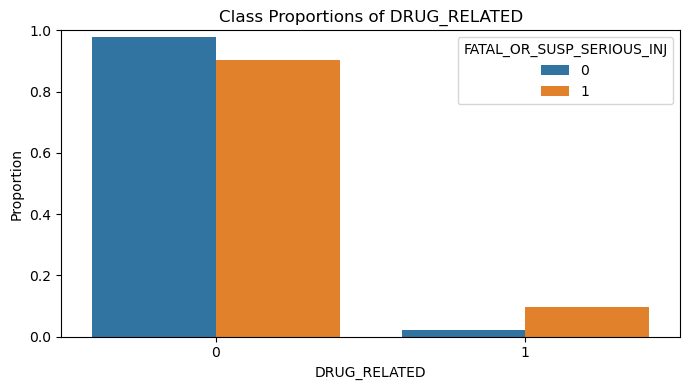

DRUG_RELATED                    0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103308  2449
1                            4565   491


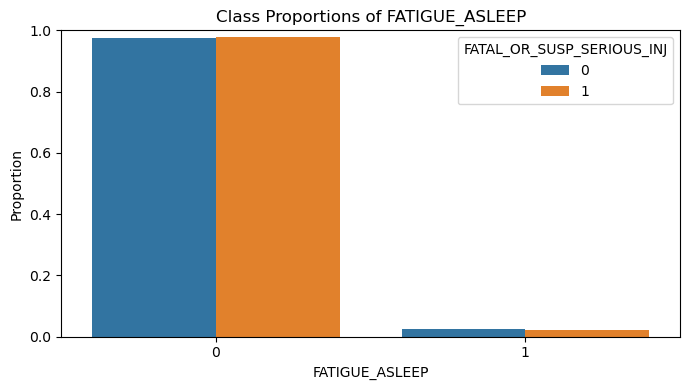

FATIGUE_ASLEEP                  0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103254  2503
1                            4948   108


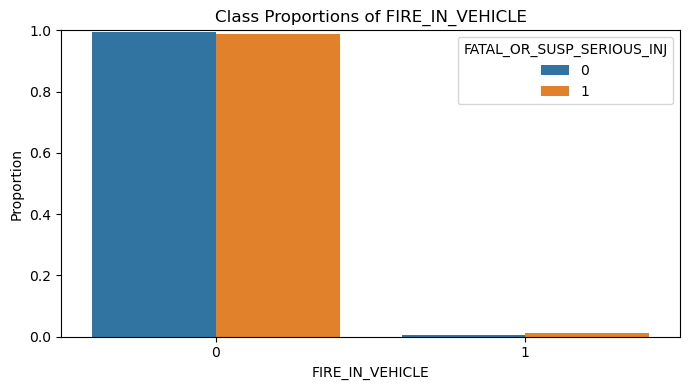

FIRE_IN_VEHICLE                 0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105295  462
1                            4997   59


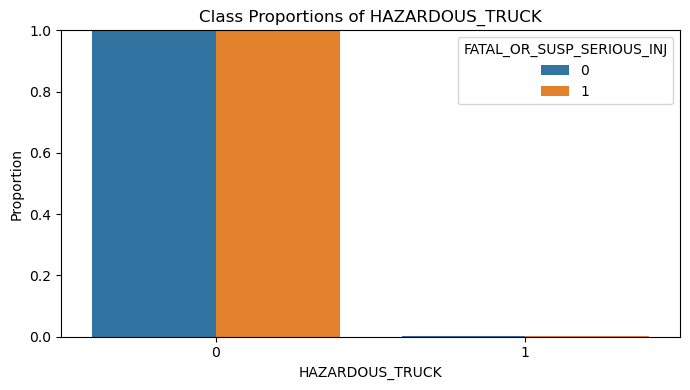

HAZARDOUS_TRUCK                 0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105636  121
1                            5044   12


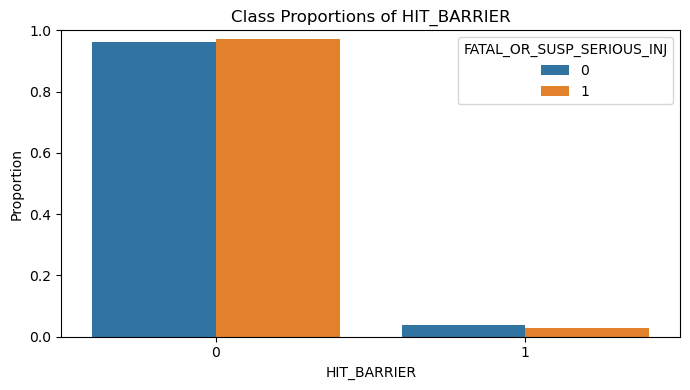

HIT_BARRIER                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101737  4020
1                            4916   140


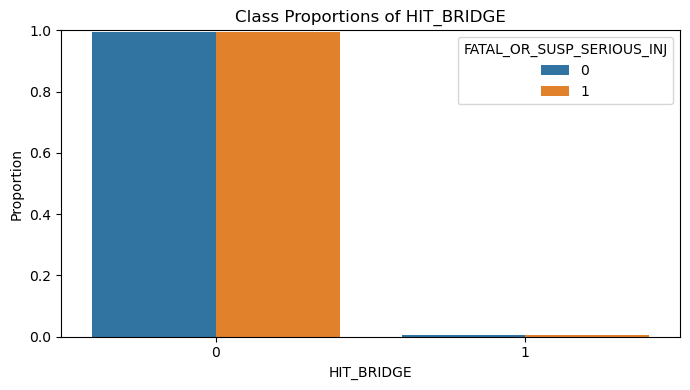

HIT_BRIDGE                      0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105330  427
1                            5028   28


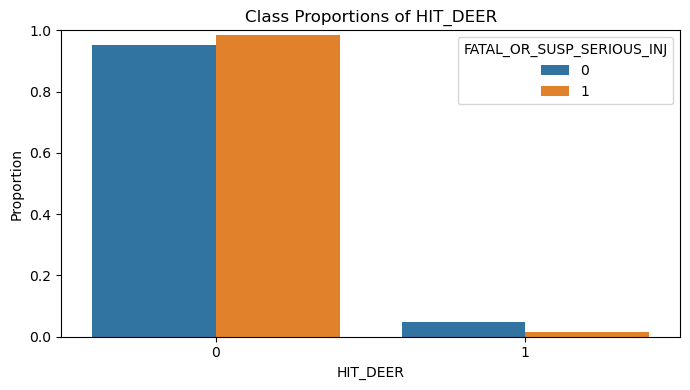

HIT_DEER                        0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100722  5035
1                            4980    76


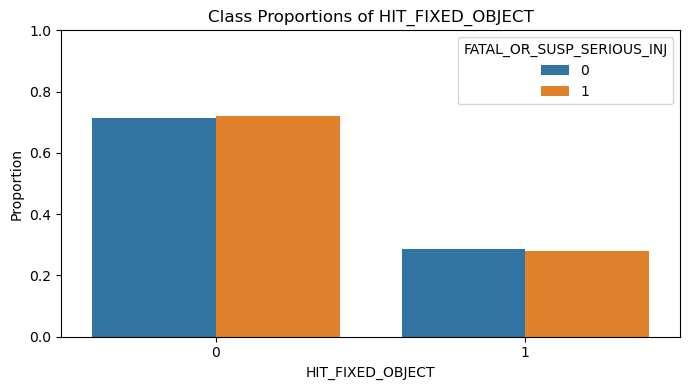

HIT_FIXED_OBJECT               0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          75611  30146
1                           3641   1415


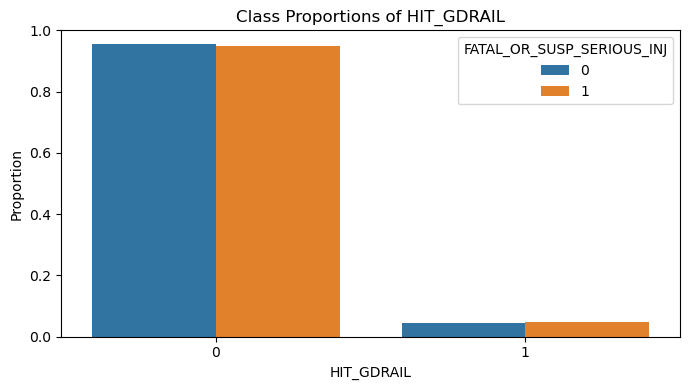

HIT_GDRAIL                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100921  4836
1                            4805   251


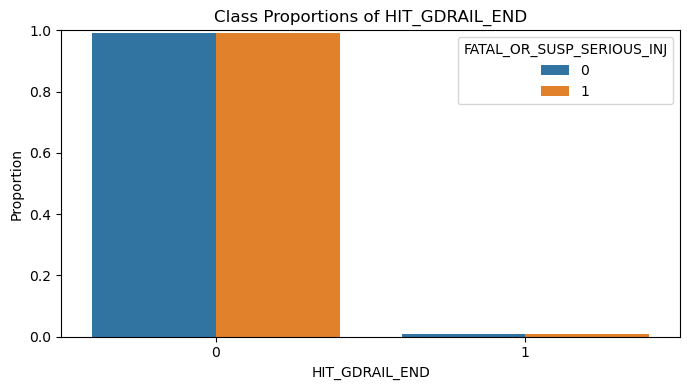

HIT_GDRAIL_END                  0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          104835  922
1                            5017   39


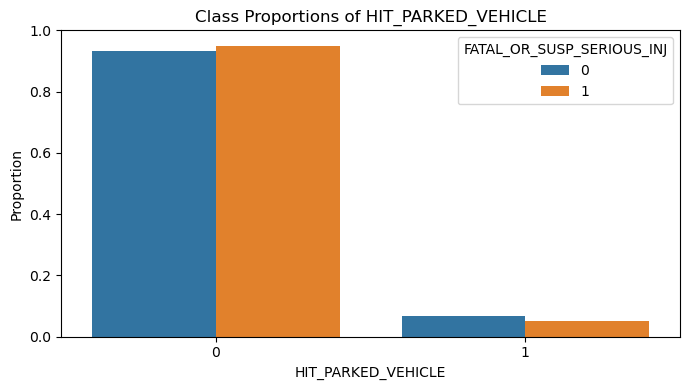

HIT_PARKED_VEHICLE             0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          98767  6990
1                           4803   253


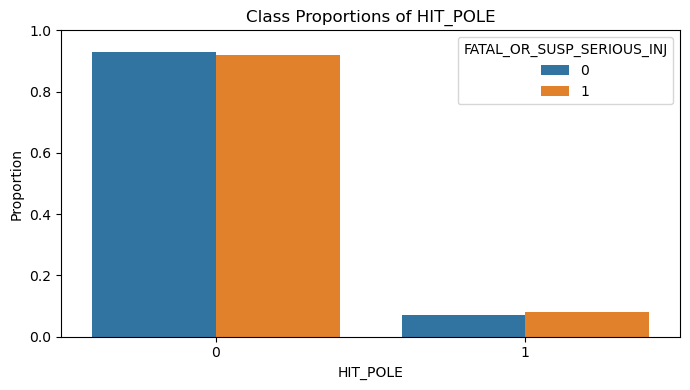

HIT_POLE                       0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          98273  7484
1                           4646   410


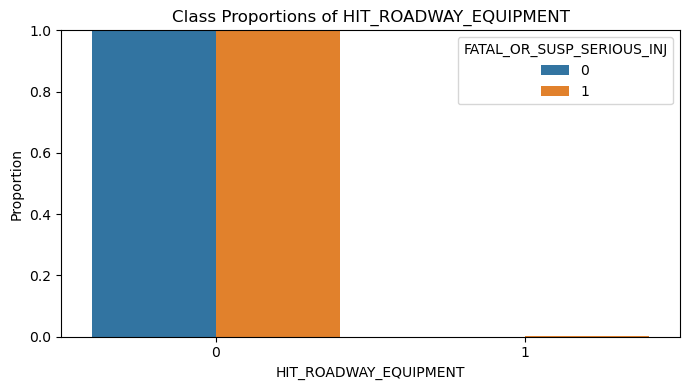

HIT_ROADWAY_EQUIPMENT           0   1
FATAL_OR_SUSP_SERIOUS_INJ            
0                          105698  59
1                            5051   5


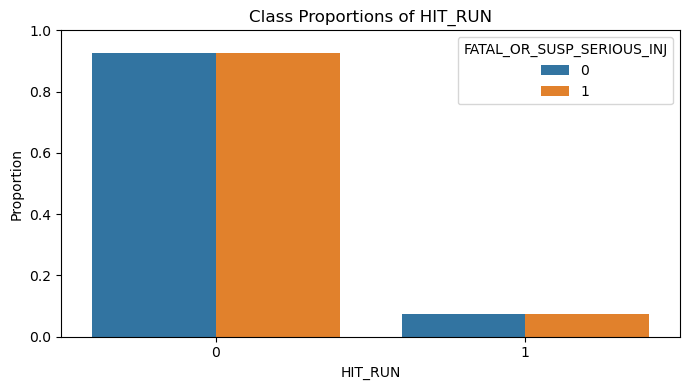

HIT_RUN                        0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          97964  7793
1                           4679   377


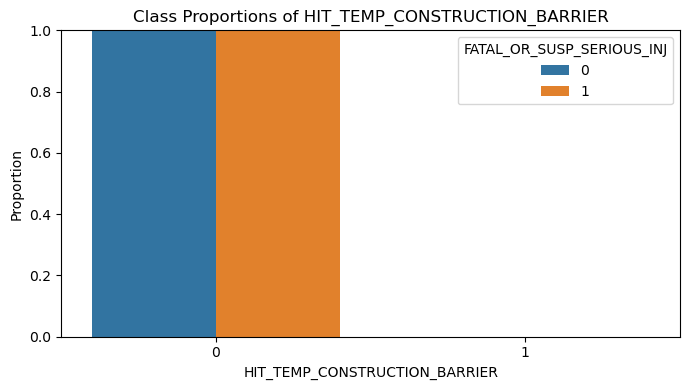

HIT_TEMP_CONSTRUCTION_BARRIER       0   1
FATAL_OR_SUSP_SERIOUS_INJ                
0                              105710  47
1                                5054   2


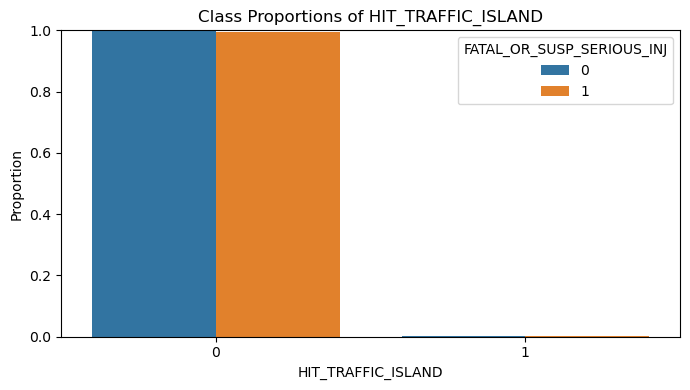

HIT_TRAFFIC_ISLAND              0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105591  166
1                            5036   20


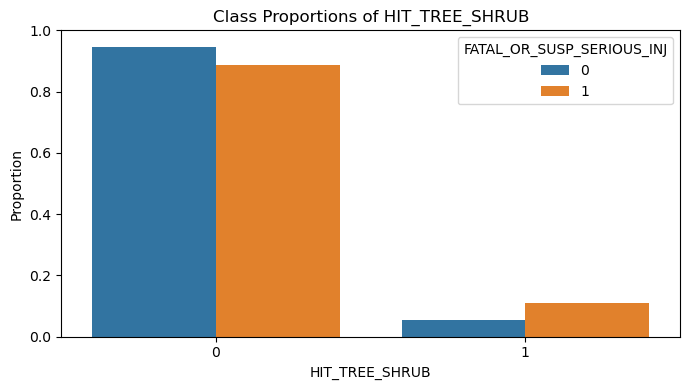

HIT_TREE_SHRUB                 0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99867  5890
1                           4492   564


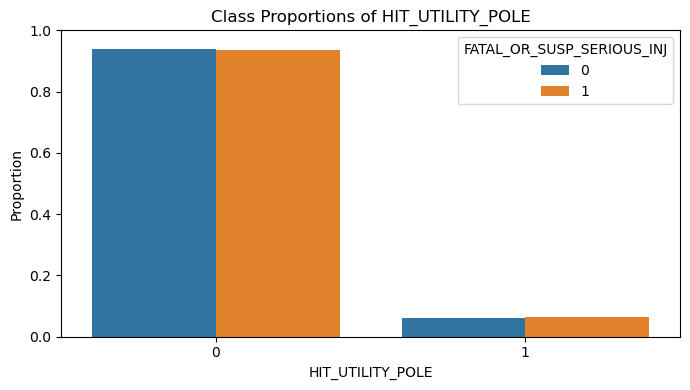

HIT_UTILITY_POLE               0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99400  6357
1                           4732   324


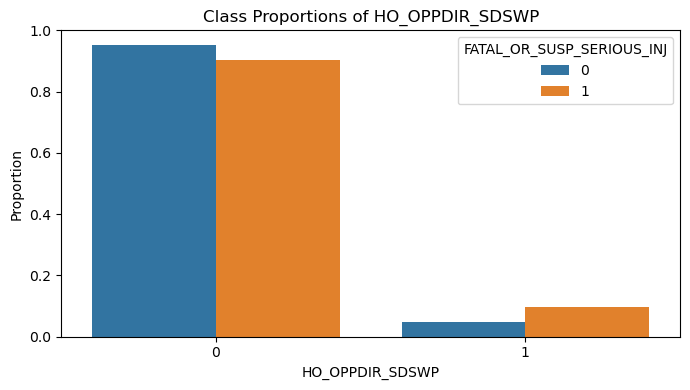

HO_OPPDIR_SDSWP                 0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100674  5083
1                            4566   490


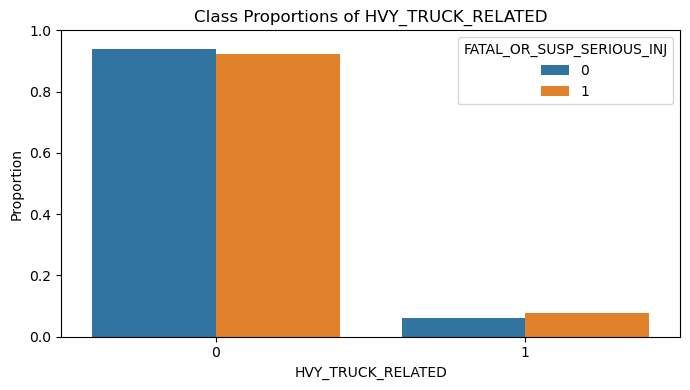

HVY_TRUCK_RELATED              0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99151  6606
1                           4670   386


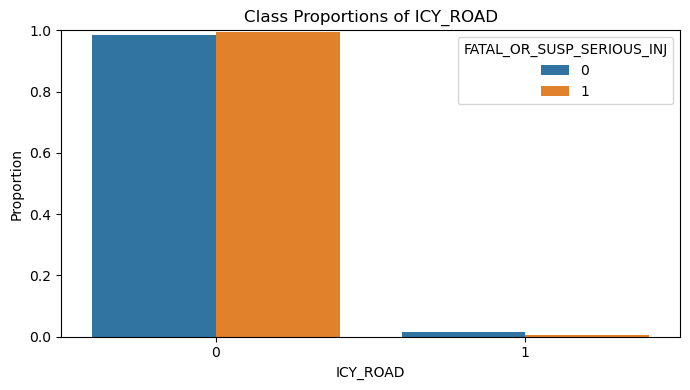

ICY_ROAD                        0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          104087  1670
1                            5023    33


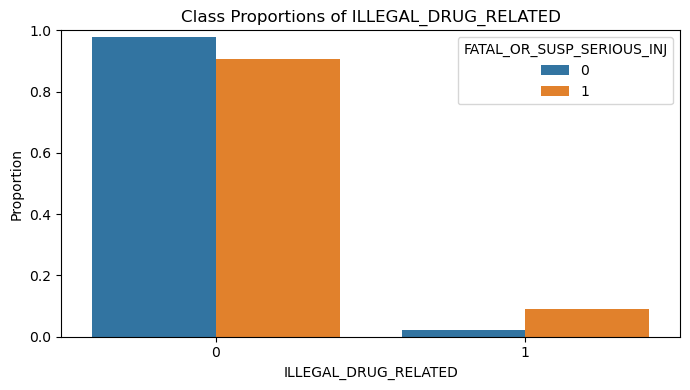

ILLEGAL_DRUG_RELATED            0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103600  2157
1                            4591   465


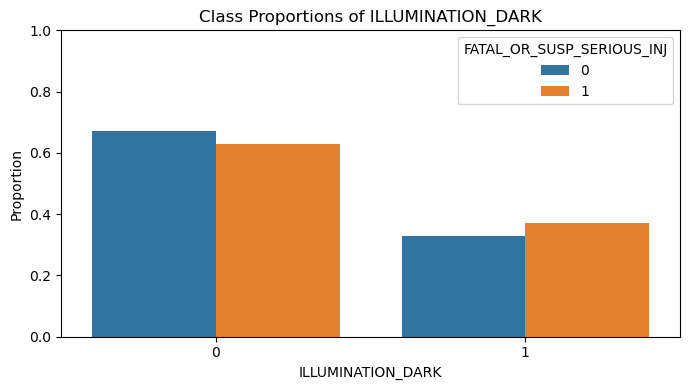

ILLUMINATION_DARK              0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          71069  34688
1                           3187   1869


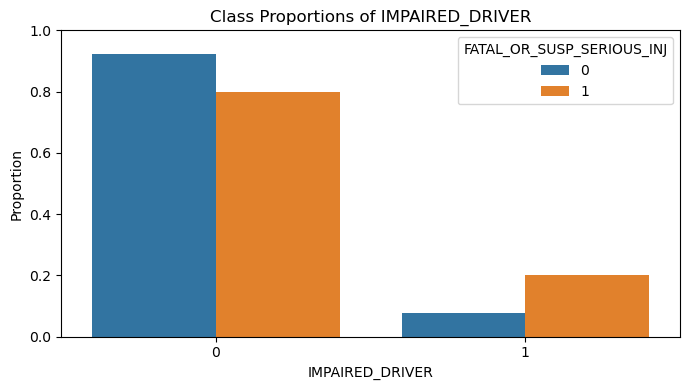

IMPAIRED_DRIVER                0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          97557  8200
1                           4045  1011


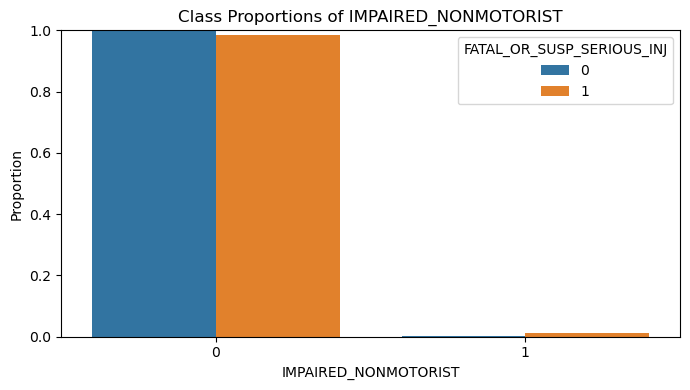

IMPAIRED_NONMOTORIST            0   1
FATAL_OR_SUSP_SERIOUS_INJ            
0                          105673  84
1                            4987  69


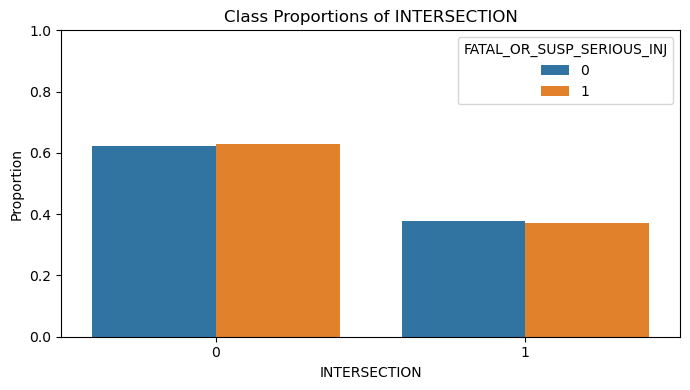

INTERSECTION                   0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          65699  40058
1                           3183   1873


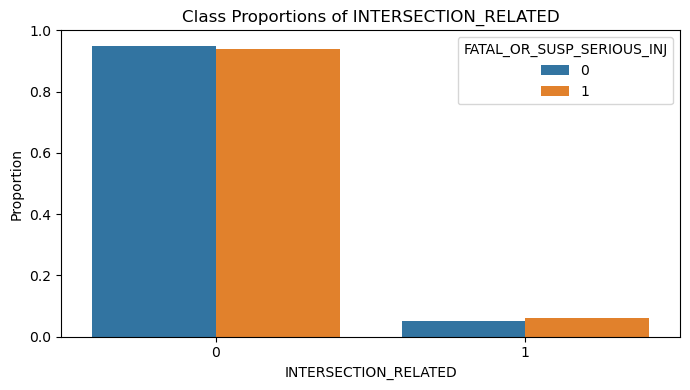

INTERSECTION_RELATED            0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100467  5290
1                            4753   303


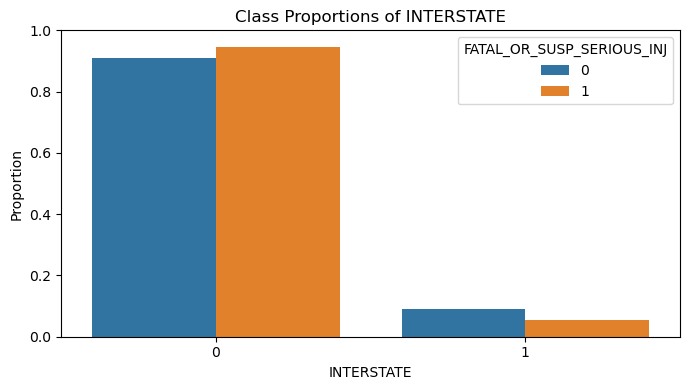

INTERSTATE                     0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          96310  9447
1                           4776   280


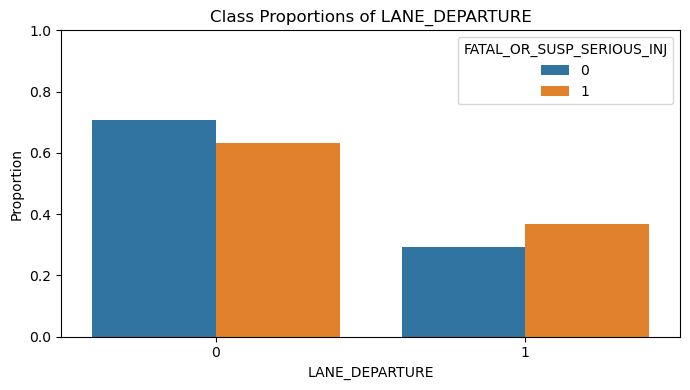

LANE_DEPARTURE                 0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          74659  31098
1                           3198   1858


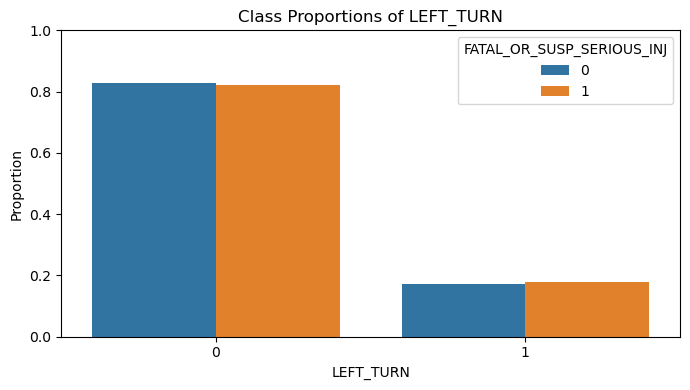

LEFT_TURN                      0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          87588  18169
1                           4158    898


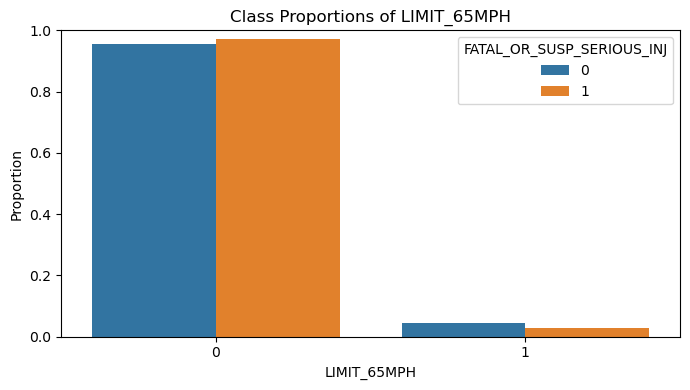

LIMIT_65MPH                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101183  4574
1                            4909   147


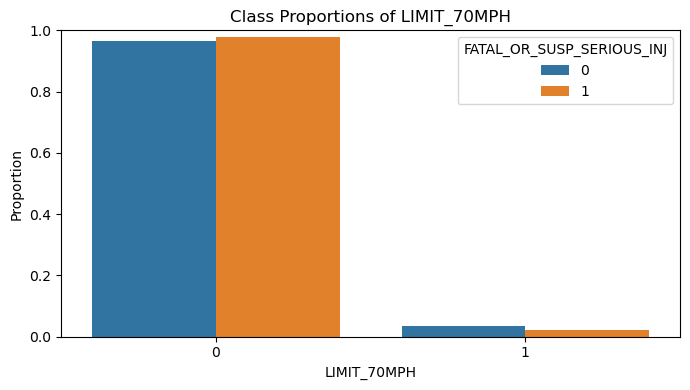

LIMIT_70MPH                     0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102156  3601
1                            4950   106


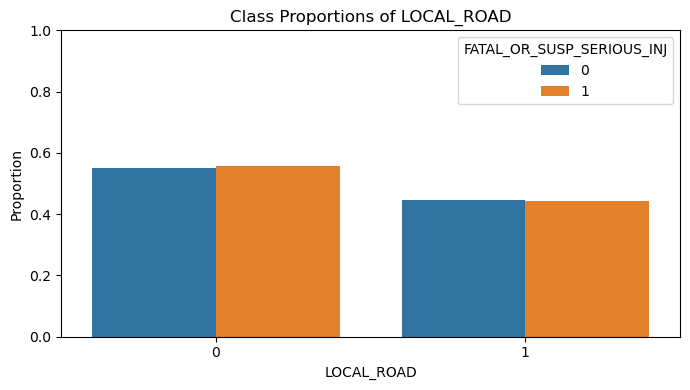

LOCAL_ROAD                     0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          58400  47357
1                           2815   2241


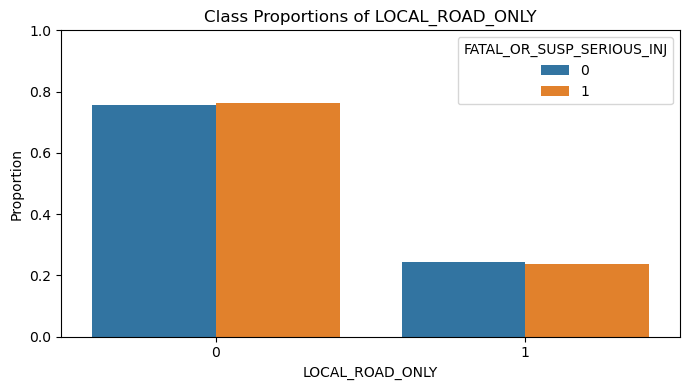

LOCAL_ROAD_ONLY                0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          79986  25771
1                           3863   1193


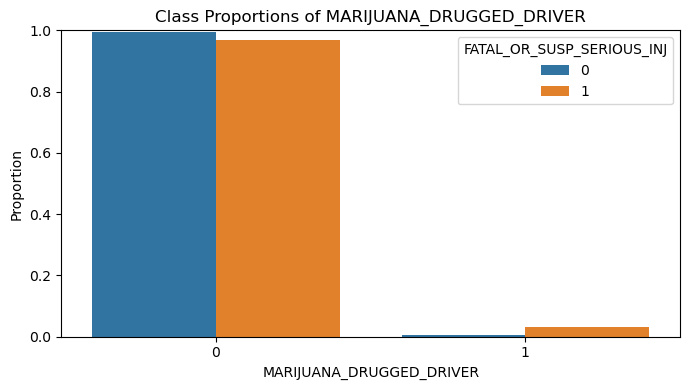

MARIJUANA_DRUGGED_DRIVER        0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105260  497
1                            4901  155


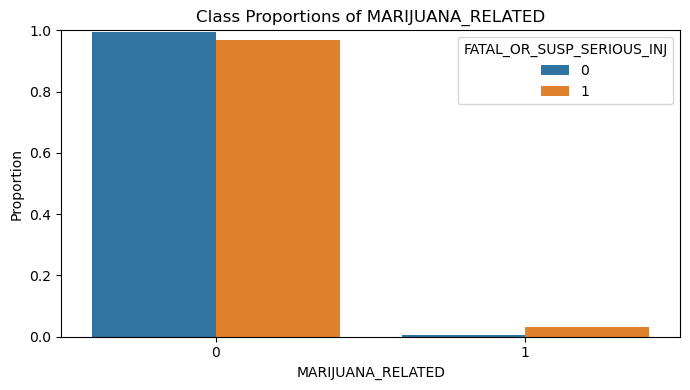

MARIJUANA_RELATED               0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105258  499
1                            4890  166


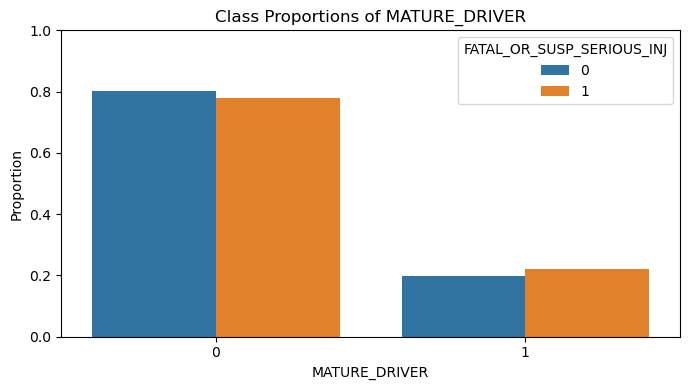

MATURE_DRIVER                  0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          84902  20855
1                           3942   1114


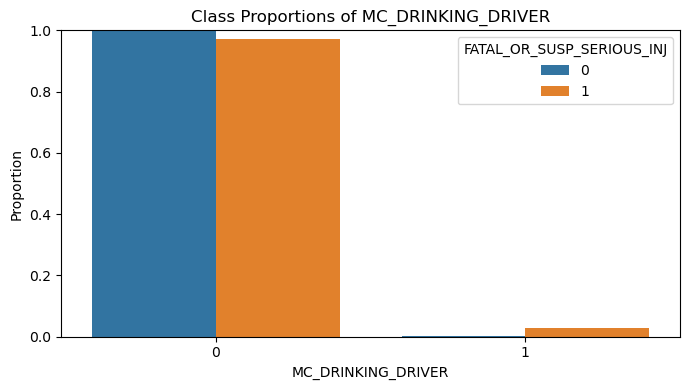

MC_DRINKING_DRIVER              0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105655  102
1                            4916  140


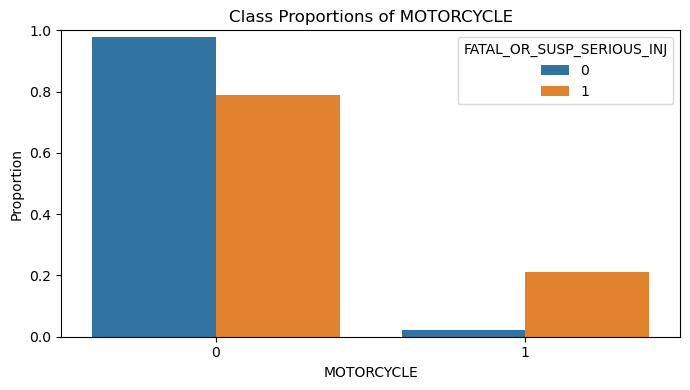

MOTORCYCLE                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103507  2250
1                            3987  1069


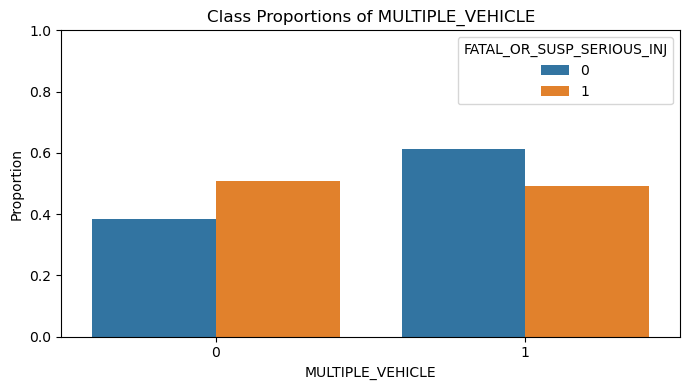

MULTIPLE_VEHICLE               0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          40793  64964
1                           2563   2493


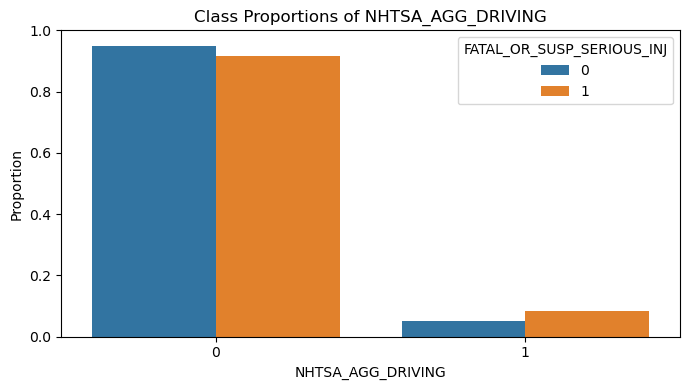

NHTSA_AGG_DRIVING               0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100184  5573
1                            4638   418


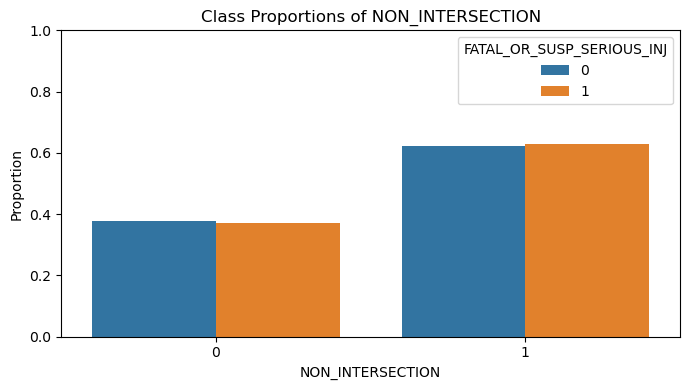

NON_INTERSECTION               0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          40058  65699
1                           1873   3183


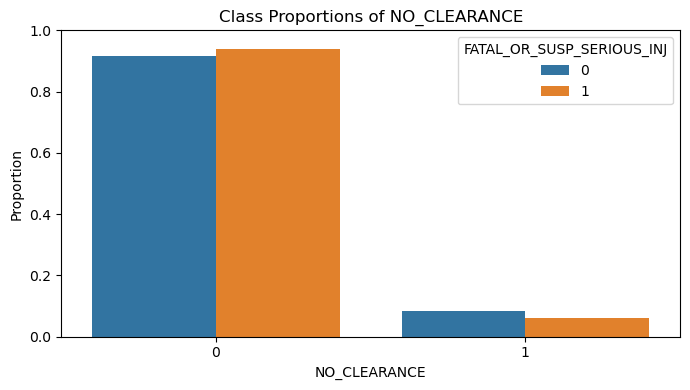

NO_CLEARANCE                   0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          97033  8724
1                           4753   303


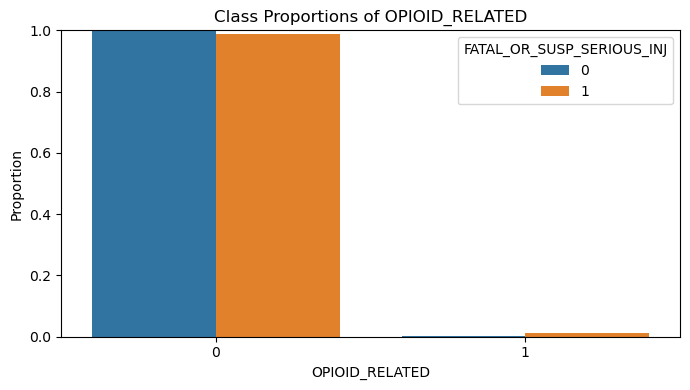

OPIOID_RELATED                  0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105572  185
1                            4996   60


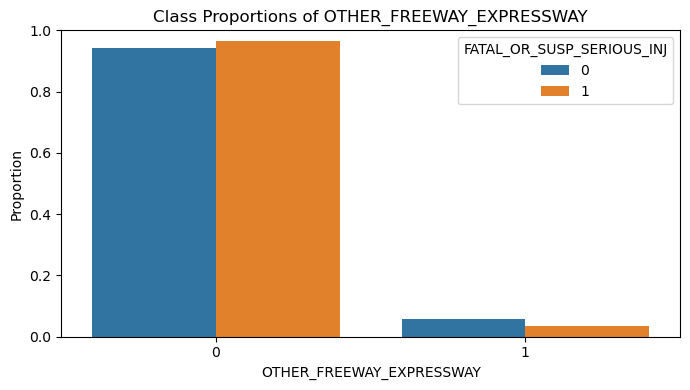

OTHER_FREEWAY_EXPRESSWAY       0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99737  6020
1                           4873   183


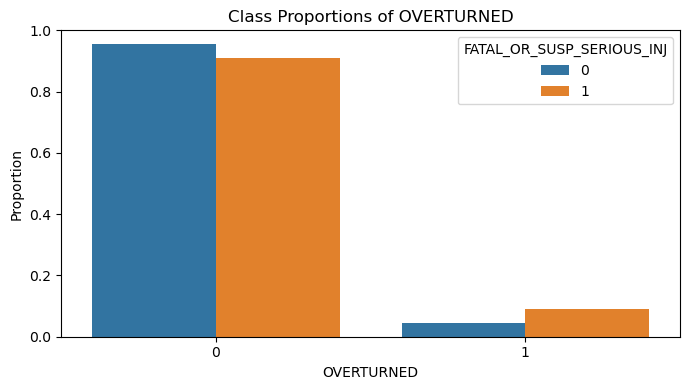

OVERTURNED                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100991  4766
1                            4595   461


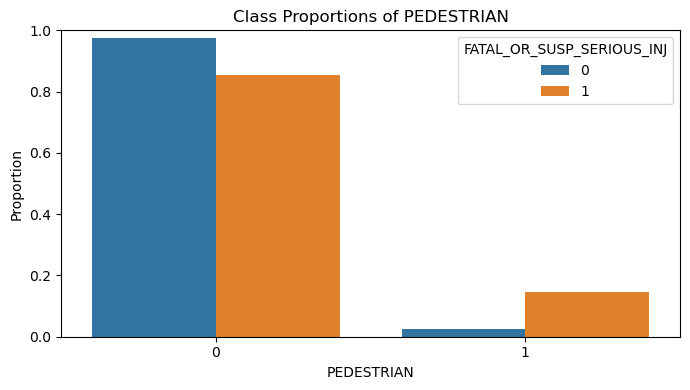

PEDESTRIAN                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103062  2695
1                            4320   736


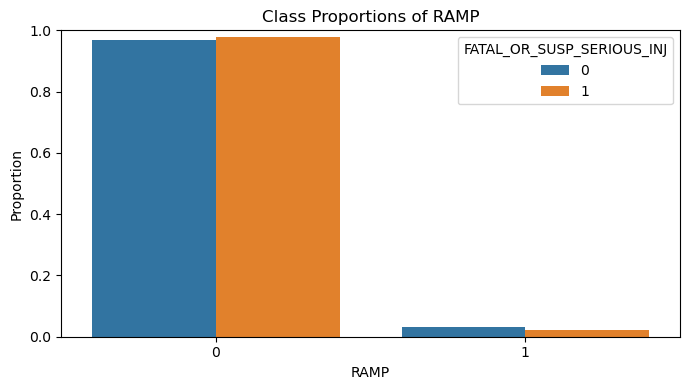

RAMP                            0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102286  3471
1                            4939   117


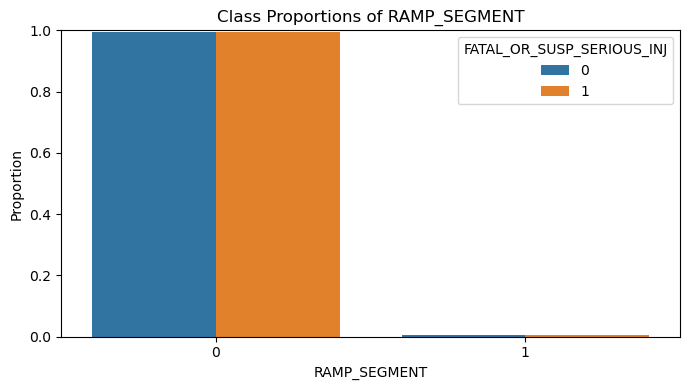

RAMP_SEGMENT                    0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105036  721
1                            5030   26


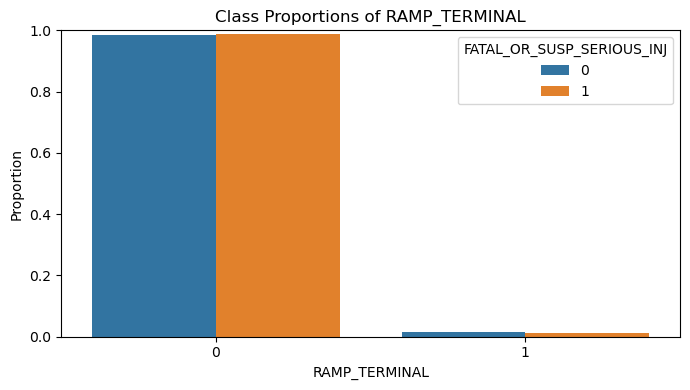

RAMP_TERMINAL                   0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          104060  1697
1                            4992    64


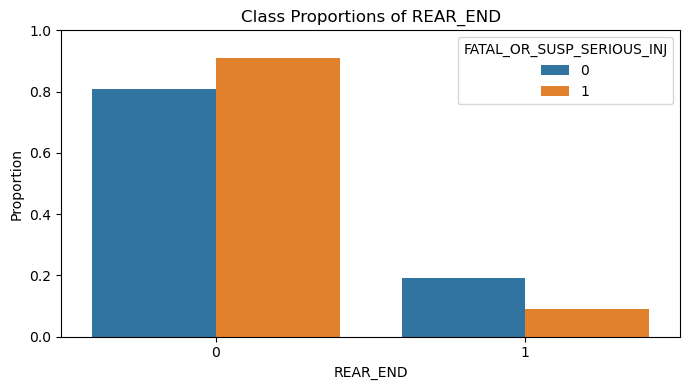

REAR_END                       0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          85374  20383
1                           4593    463


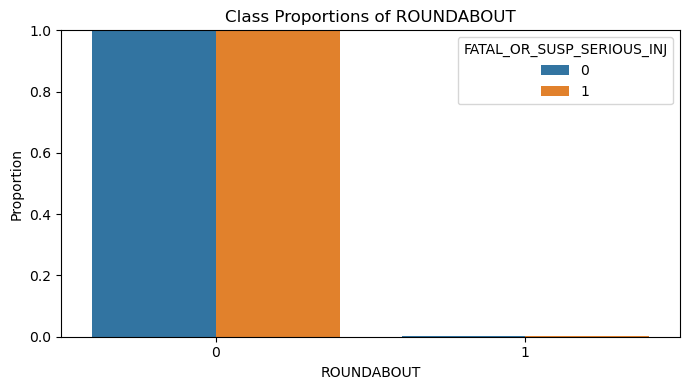

ROUNDABOUT                      0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105645  112
1                            5052    4


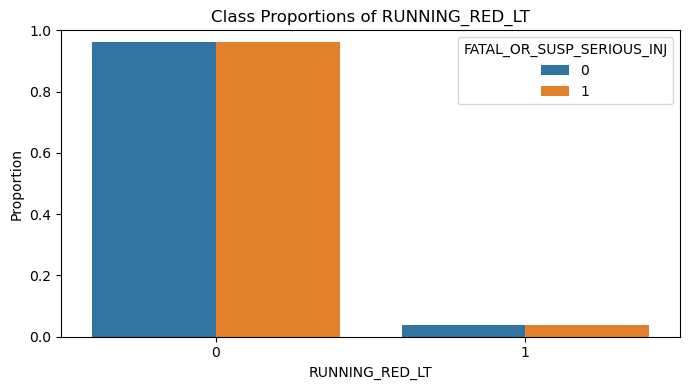

RUNNING_RED_LT                  0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          101663  4094
1                            4868   188


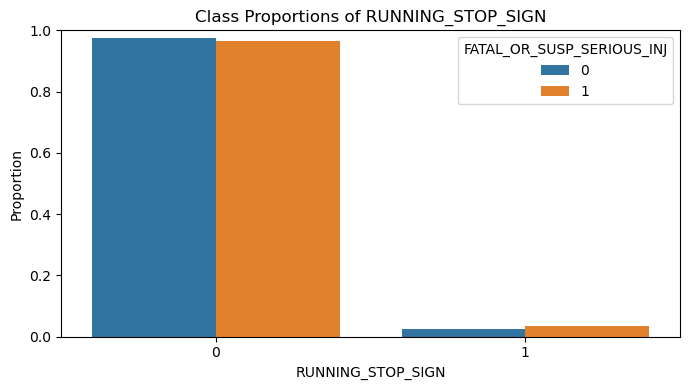

RUNNING_STOP_SIGN               0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102965  2792
1                            4884   172


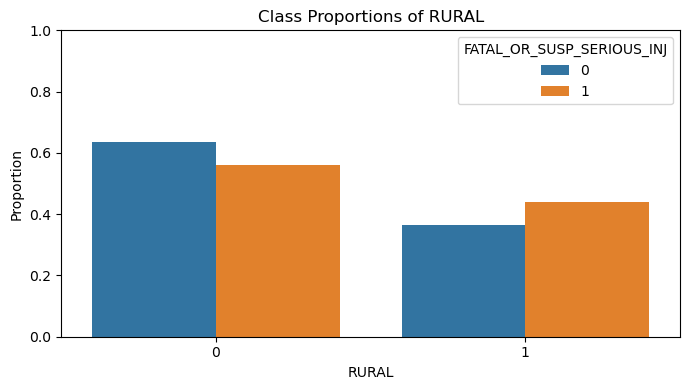

RURAL                          0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          67364  38393
1                           2827   2229


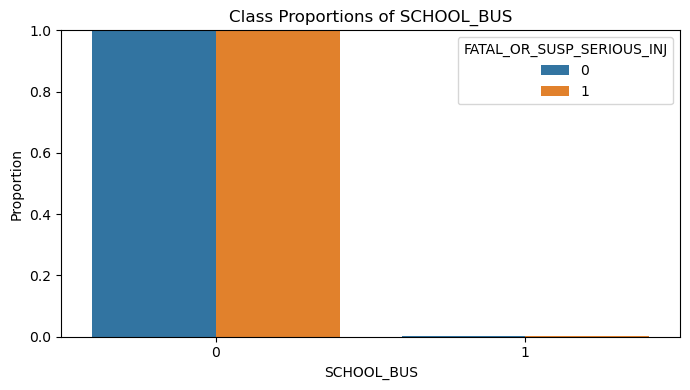

SCHOOL_BUS                      0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105542  215
1                            5049    7


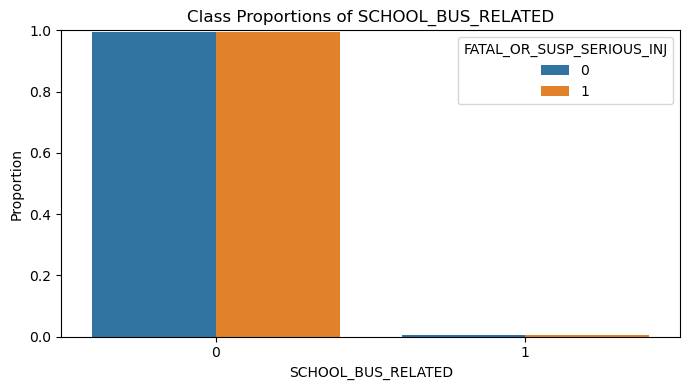

SCHOOL_BUS_RELATED              0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105227  530
1                            5031   25


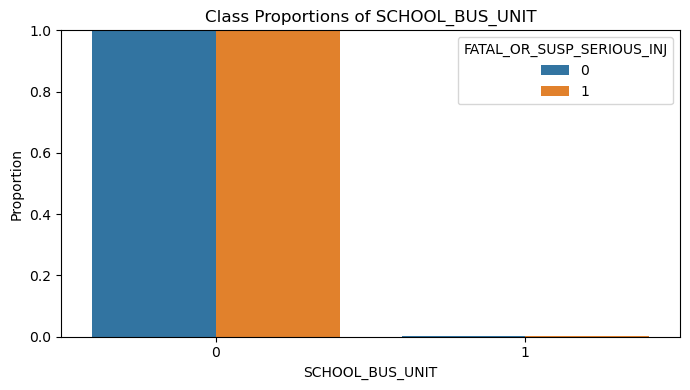

SCHOOL_BUS_UNIT                 0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105542  215
1                            5049    7


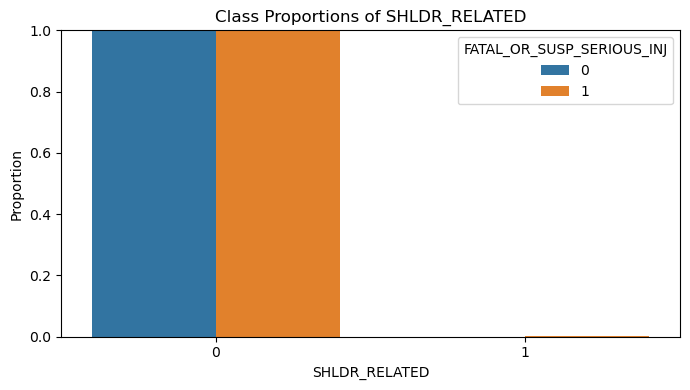

SHLDR_RELATED                   0   1
FATAL_OR_SUSP_SERIOUS_INJ            
0                          105682  75
1                            5050   6


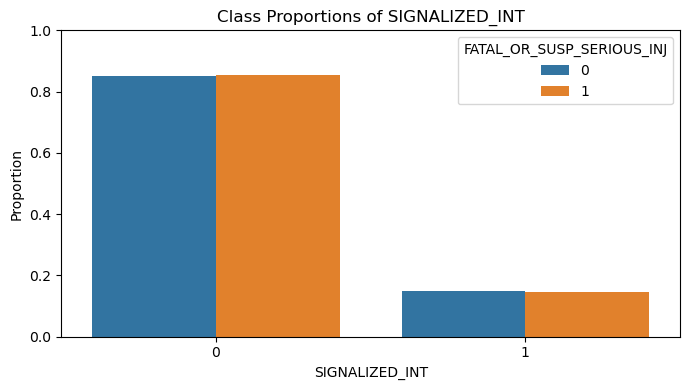

SIGNALIZED_INT                 0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          90065  15692
1                           4311    745


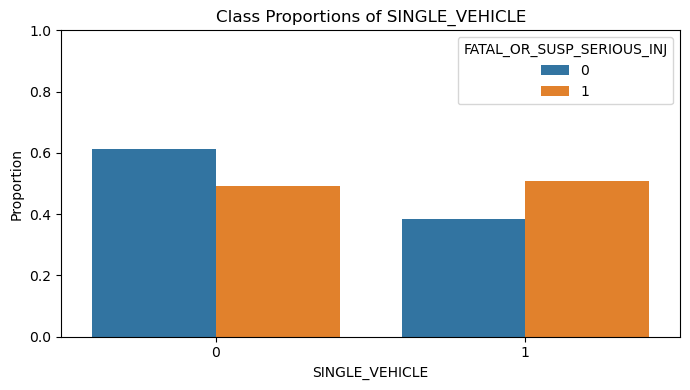

SINGLE_VEHICLE                 0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          64964  40793
1                           2493   2563


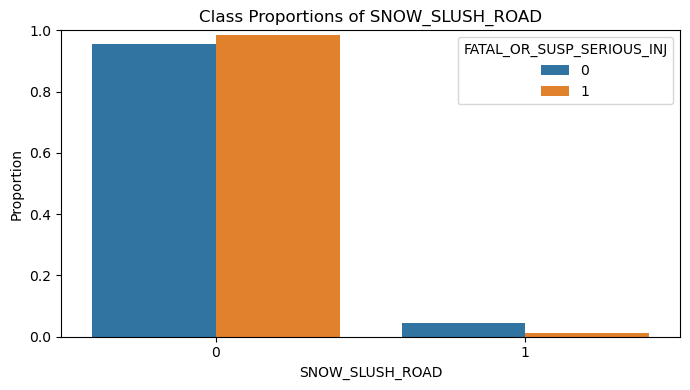

SNOW_SLUSH_ROAD                 0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100897  4860
1                            4987    69


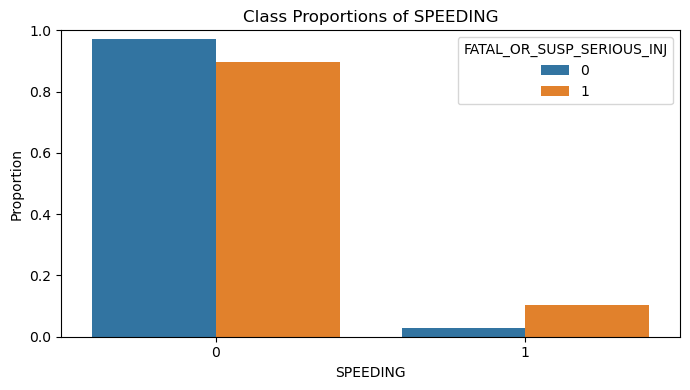

SPEEDING                        0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102739  3018
1                            4535   521


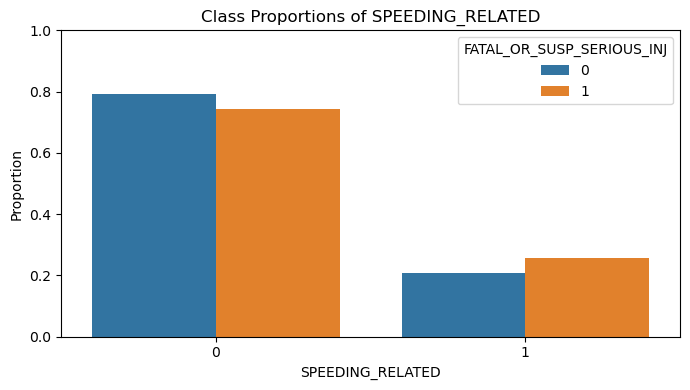

SPEEDING_RELATED               0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          83760  21997
1                           3755   1301


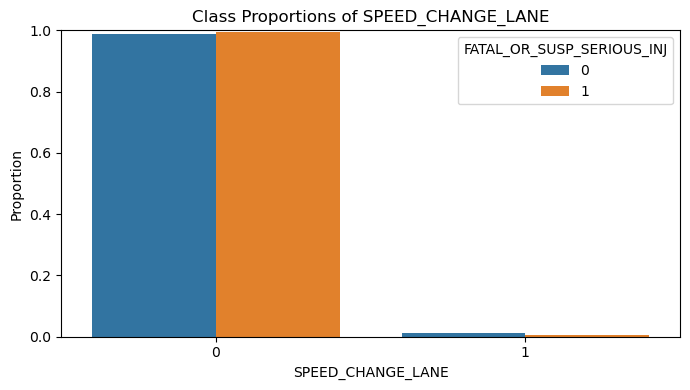

SPEED_CHANGE_LANE               0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          104486  1271
1                            5026    30


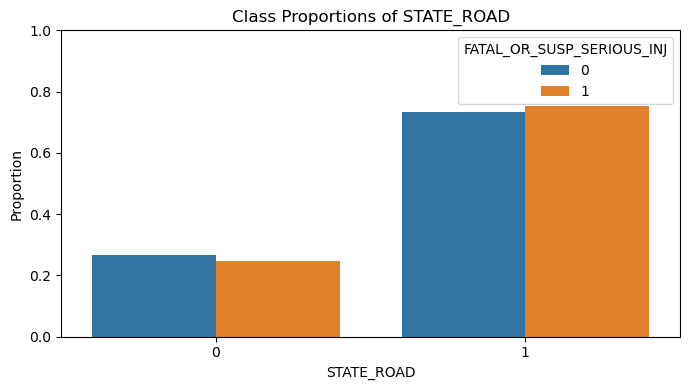

STATE_ROAD                     0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          28047  77710
1                           1248   3808


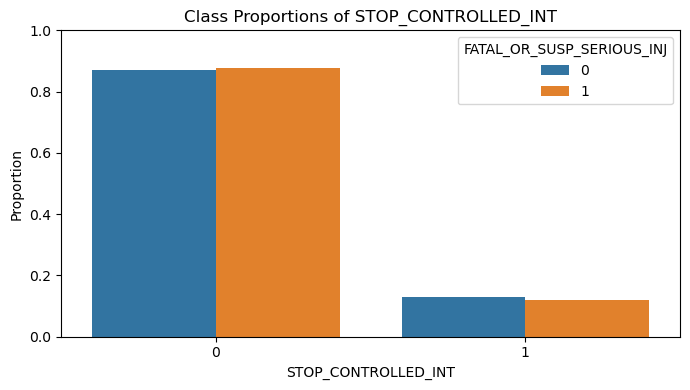

STOP_CONTROLLED_INT            0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          92076  13681
1                           4442    614


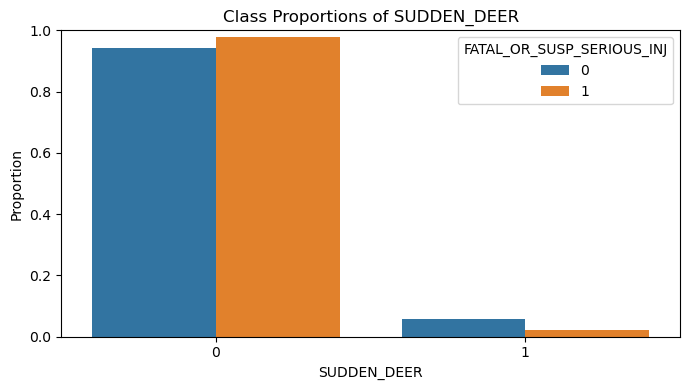

SUDDEN_DEER                    0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          99515  6242
1                           4945   111


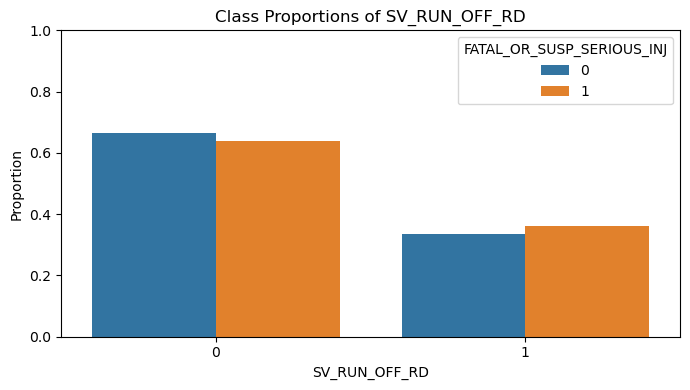

SV_RUN_OFF_RD                  0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          70307  35450
1                           3236   1820


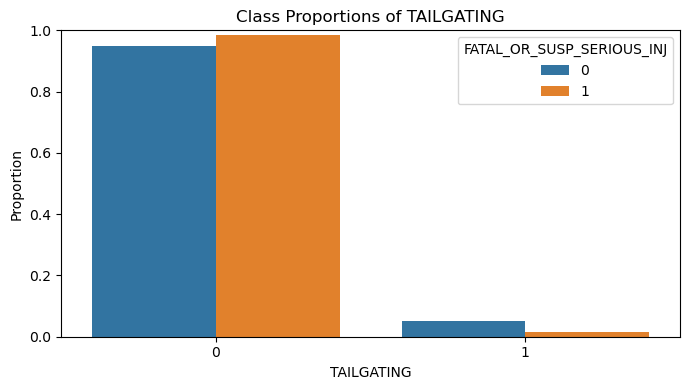

TAILGATING                      0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100329  5428
1                            4980    76


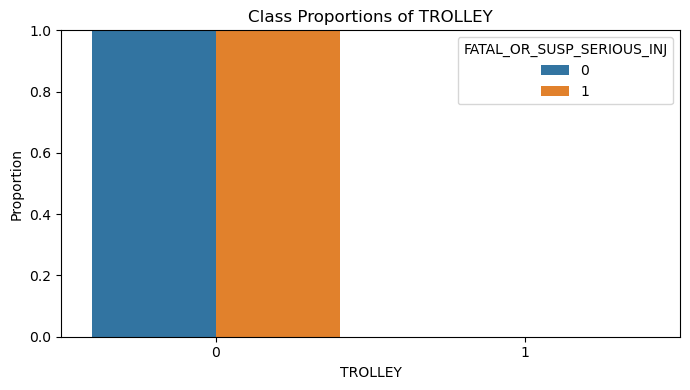

TROLLEY                         0  1
FATAL_OR_SUSP_SERIOUS_INJ           
0                          105749  8
1                            5055  1


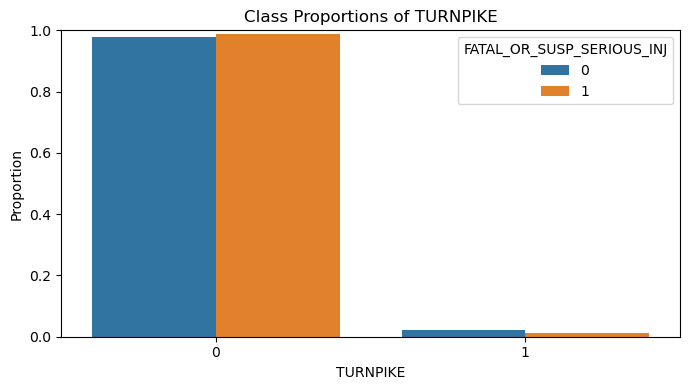

TURNPIKE                        0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          103475  2282
1                            5001    55


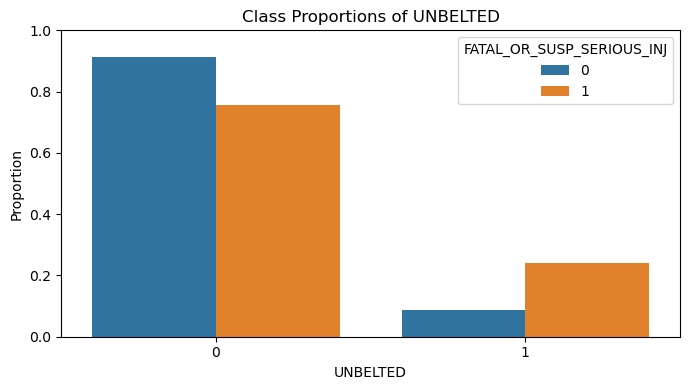

UNBELTED                       0     1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          96402  9355
1                           3832  1224


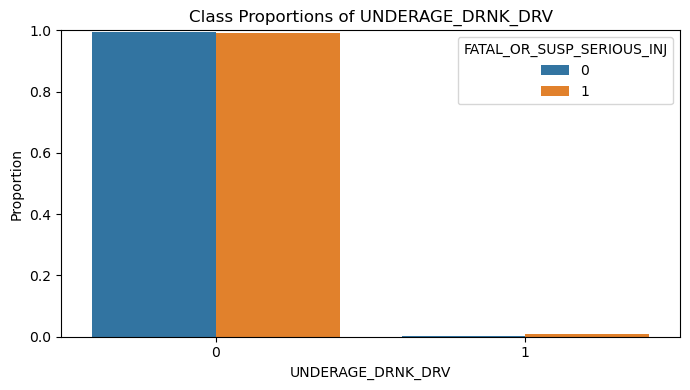

UNDERAGE_DRNK_DRV               0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105350  407
1                            5004   52


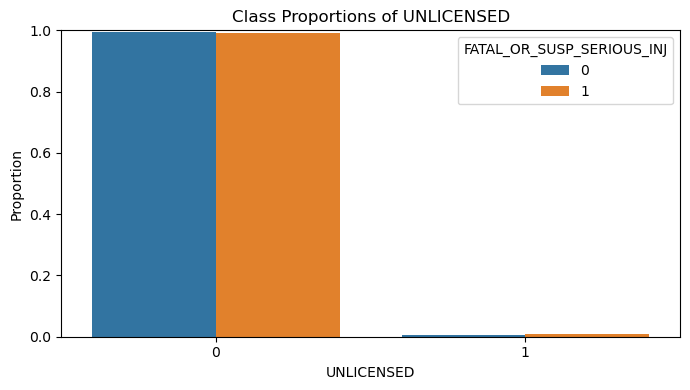

UNLICENSED                      0    1
FATAL_OR_SUSP_SERIOUS_INJ             
0                          105130  627
1                            5017   39


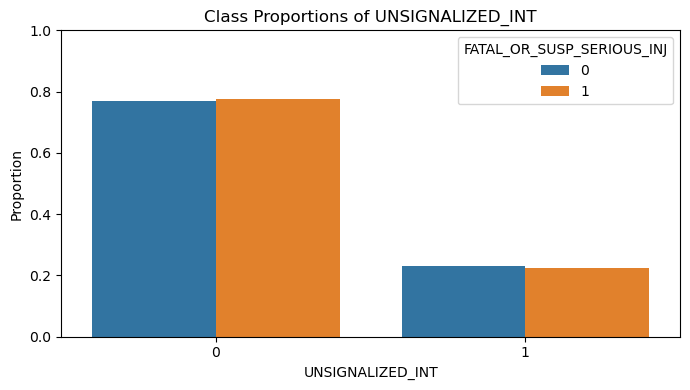

UNSIGNALIZED_INT               0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          81391  24366
1                           3928   1128


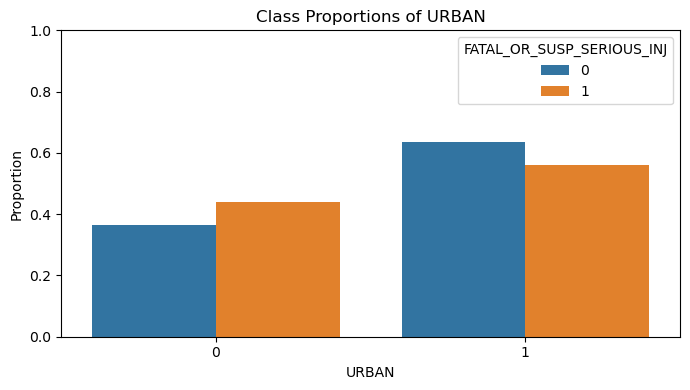

URBAN                          0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          38393  67364
1                           2229   2827


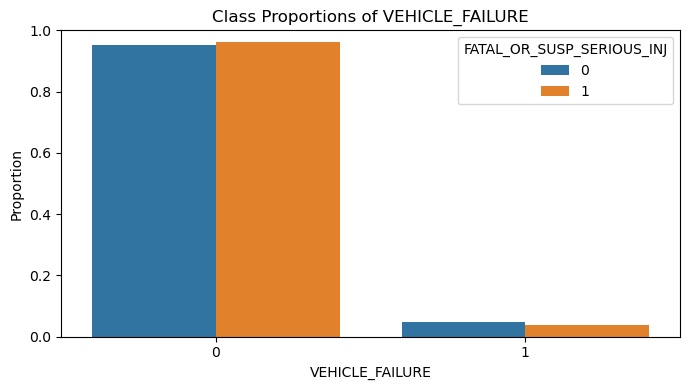

VEHICLE_FAILURE                 0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          100613  5144
1                            4870   186


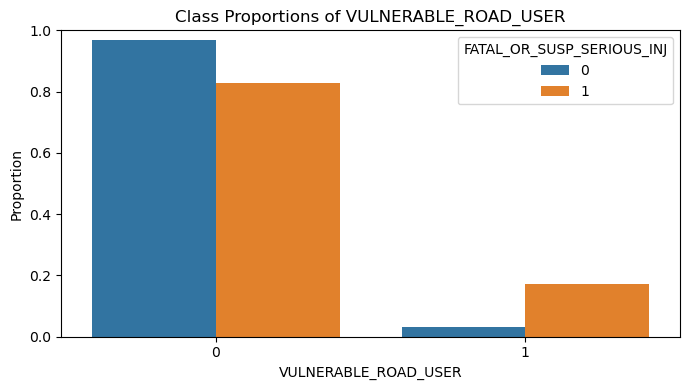

VULNERABLE_ROAD_USER            0     1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          102305  3452
1                            4180   876


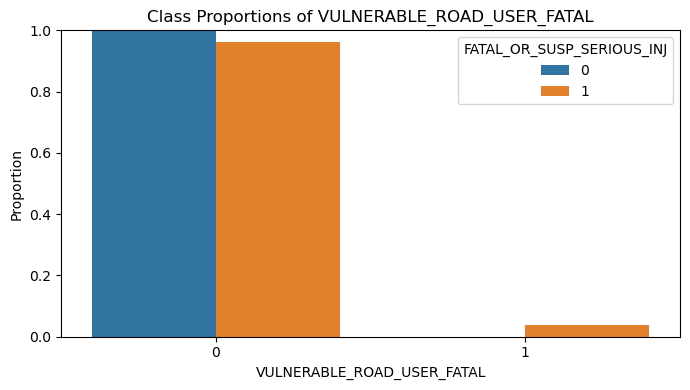

VULNERABLE_ROAD_USER_FATAL       0    1
FATAL_OR_SUSP_SERIOUS_INJ              
0                           105757    0
1                             4865  191


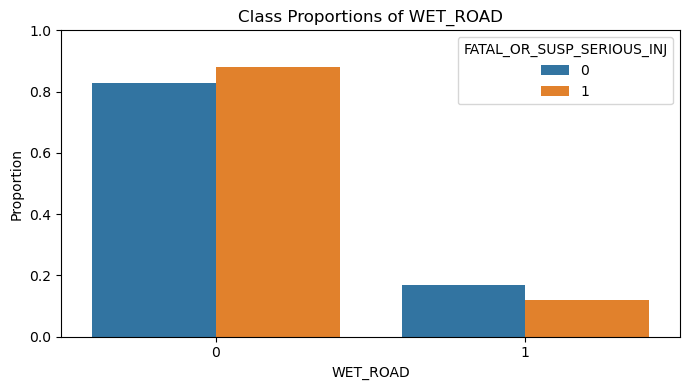

WET_ROAD                       0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          87741  18016
1                           4450    606


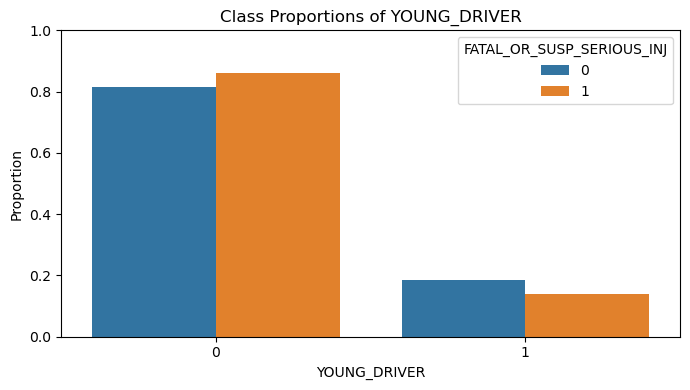

YOUNG_DRIVER                   0      1
FATAL_OR_SUSP_SERIOUS_INJ              
0                          86239  19518
1                           4350    706
                           feature  Fatal/Serious  Not Fatal/Serious  \
0               AGGRESSIVE_DRIVING       0.515032           0.566554   
1                  ALCOHOL_RELATED       0.164161           0.065537   
2                      ANGLE_CRASH       0.253165           0.301569   
3                              ATV       0.017207           0.001087   
4                          BICYCLE       0.040546           0.010080   
5                       CELL_PHONE       0.011472           0.017673   
6                     COMM_VEHICLE       0.089201           0.072109   
7                     CROSS_MEDIAN       0.053600           0.014410   
8                      CURVED_ROAD       0.218948           0.171705   
9                  CURVE_DVR_ERROR       0.062698           0.031194   
10                    DEER_RELATED       0.02215

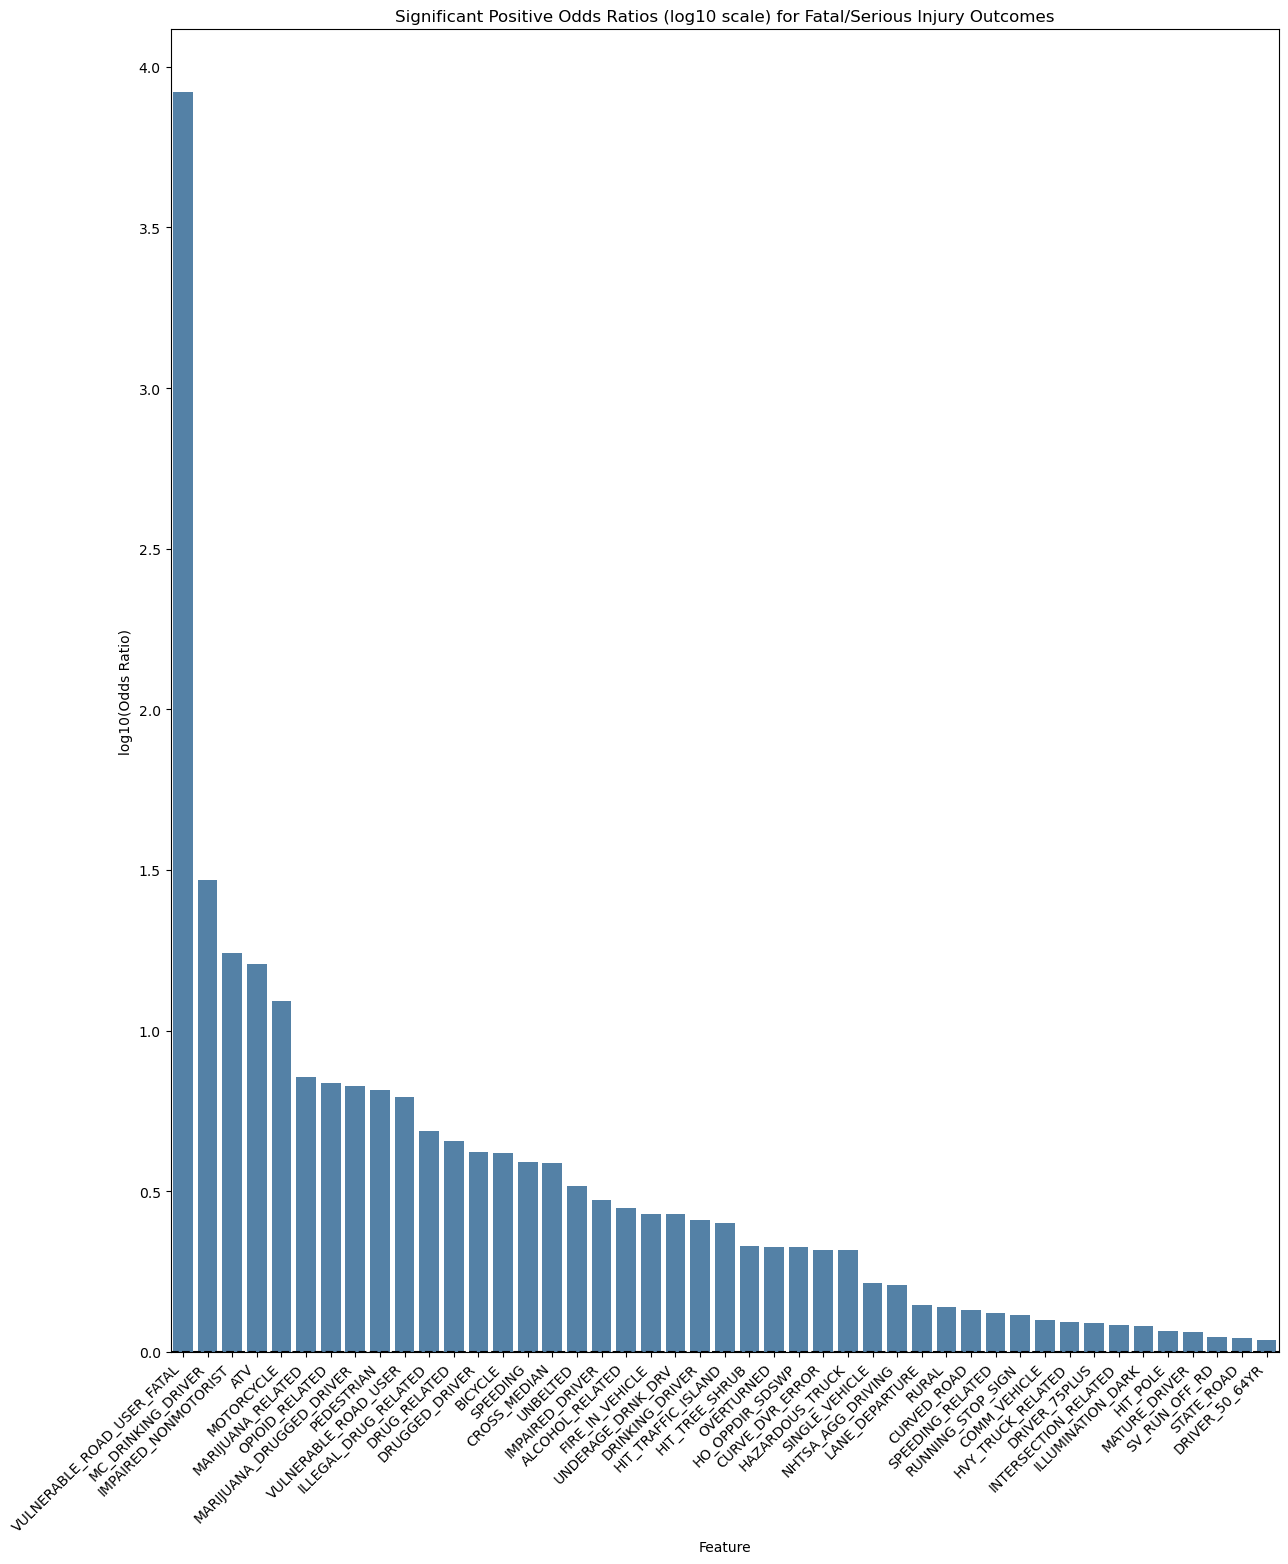

In [107]:
#Visualize the binary outcomes for each feature across the dataframe, grouped by "FATAL_OR_SUSP_SERIOUS_INJ"  

target = "FATAL_OR_SUSP_SERIOUS_INJ"
features = data.columns[:-1]

summary = []

for col in features:
    
    #Plot the binary outcomes for each feauture as grouped by ""FATAL_OR_SUSP_SERIOUS_INJ
    prop = data.groupby(target)[col].mean()

    prop_df = (
        data
        .groupby(target)[col]
        .value_counts(normalize=True)
        .rename("proportion")
        .reset_index()
    )

    # Plot
    plt.figure(figsize=(7, 4))
    sns.barplot(
        data=prop_df,
        x=col,
        y="proportion",
        hue=target
    )
    plt.title(f"Class Proportions of {col}")
    plt.ylabel("Proportion")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    #Set up crosstab for chi squared and odds ratio calculations
    table = pd.crosstab(data[target], data[col])
    
    print(table)
    
    # Ensure consistent ordering for odds ratio calculation
    table = table.loc[[0, 1], [0, 1]]

    a, b = table.loc[0, 0], table.loc[0, 1]
    c, d = table.loc[1, 0], table.loc[1, 1]

    # Odds ratio correction factor to avoid NaN
    if min(a, b, c, d) == 0:
        a += 0.5; b += 0.5; c += 0.5; d += 0.5

    odds_ratio = (d/c) / (b/a)

    #Perform Chi squared analysis
    chi2, p, _, _ = chi2_contingency(table)
    
    #Append feature results to summary dictionary
    summary.append({
        "feature": col,
        "Fatal/Serious": prop.loc[1],
        "Not Fatal/Serious": prop.loc[0],
        "difference": prop.loc[1] - prop.loc[0],
        "chi2": chi2,
        "odds_ratio": odds_ratio,
        "Log10_odds_ratio": np.log10(odds_ratio),
        "p_value": p})
    
#convert summary dictionary to dataframe

summary_df = pd.DataFrame(summary)

#print summary table
with pd.option_context("display.max_rows", None):
    print(summary_df)
    
#Filter summary dataframe to only have signigicant, positive odds ratios (indicating increased odds of fatality/serious injury)
sig_or_df = summary_df[(summary_df["odds_ratio"] > 1) &(summary_df["p_value"] < 0.05)].sort_values("Log10_odds_ratio", ascending=False)


#Plot the features with significant, positive odds ratios indicating increased odds of fatality/serious injury
plt.figure(figsize=(13, max(4, 0.35 * len(sig_or_df))))
sns.barplot(
    data=sig_or_df,
    x="feature",
    y="Log10_odds_ratio",
    color="steelblue")

plt.axhline(0, color="black", linestyle="--")  # log10(OR)=0 corresponds to OR=1
plt.ylabel("log10(Odds Ratio)")
plt.xlabel("Feature")
plt.title("Significant Positive Odds Ratios (log10 scale) for Fatal/Serious Injury Outcomes")
plt.xticks(rotation=45, ha="right")  # rotate feature labels for readability
plt.tight_layout()
plt.show()



# Conclusions

The analysis above identified over 40 factors that increased, to a statistically significant level, the odds of a fatal or serious injury resulting from a traffic accident. It should be noted that there is some overlap in the many of the features (e.g. "Drug related" and "Drugged driver"), so the number of factors is probably somewhat overstated. Broadly, the results can be binned into several categories of risk factors. First, several features reflect the increased vulnerability of pedestrians or those involved in accidents operating less safe vehicles (bicycles, motorcycles, ATVs). Another pattern is increased risk from impairment (alcohol, opioids, marijuana). The impact of adverse driver behavior is also clearly shown in the results; for example, both speeding and aggressive driving are among the risk-increasing behaviors captured in the data, as was not wearing a seat belt. Environment characteristics (illumination, rural settings) also were shown to be significant. Unsurprisingly, the chacteristics of crashes (vehicle type, overturned vehicles, vehicle fires, stationary object type) were also highlighted among significant risk factors. Driver age was also found to be a risk factor as being between 50-64 years of age or above 75 years old were significantly more likely in fatal or serious accidents. Overall, the risk factors identified represent the complexity of driving in the modern world, but reinforce some common wisdoms for safe driving or transportation: do not drive impaired, do not drive recklessly, wear a seatbelt, and be more mindful of the risks of operating alternative vehicles (e.g. bikes, motorcycles) on the roadways.

# References
1. https://www.nhtsa.gov/press-releases/nhtsa-estimates-39345-traffic-fatalities-2024
2. https://cdan.dot.gov/tsftables/Fatalities%20and%20Fatality%20Rates.pdf
3. https://gis.penndot.pa.gov/gishub/crashZip/Statewide/Statewide_2024.zip
4. https://gis.penndot.pa.gov/gishub/crashZip/Crash_Data_Dictionary_2025.pdf